
# Restaurant Analysis
# Loading and preparing restaurant data with Mexican cuisine labels


In [2]:

#%%
# Import required libraries
import pandas as pd
import json
import glob

#%%
# Helper function to extract coordinates from JSON string
def extract_coordinates(coord_str):
    try:
        coord_str = coord_str.replace('""', '"')
        coords = json.loads(coord_str)
        return pd.Series([coords['latitude'], coords['longitude']])
    except:
        return pd.Series([None, None])

#%%
# Load and prepare the data
print("Loading data from multiple files...")
# Create a list of all CSV files in the data directory
csv_files = glob.glob('data/*.csv')

# Read and combine all CSV files
df_list = []
for file in csv_files:
    try:
        temp_df = pd.read_csv(file)
        df_list.append(temp_df)
        print(f"Loaded: {file}")
    except Exception as e:
        print(f"Error loading {file}: {e}")

# Combine all dataframes
df = pd.concat(df_list, ignore_index=True)

# Remove duplicates based on name and address
initial_count = len(df)
df = df.drop_duplicates(subset=['name', 'address'], keep='first')
duplicates_removed = initial_count - len(df)
print(f"\nRemoved {duplicates_removed} duplicate entries")
print(f"Total unique records: {len(df)}")

#%%
# Extract coordinates
print("Extracting coordinates...")
df[['latitude', 'longitude']] = df['coordinates'].apply(extract_coordinates)

#%%
# Add Mexican restaurant labels
mexican_keywords = (
    'mexican|taco|burrito|tex-mex|cantina|'
    'guadalajara|tijuana|cancun|monterrey|'
    'enchilada|quesadilla|guacamole|salsa|'
    'tortilla|fajita|chipotle'
)

df['is_mexican'] = (
    df['main_category'].str.lower().str.contains('mexican', na=False) |
    df['name'].str.lower().str.contains(mexican_keywords, na=False) |
    df['categories'].str.lower().str.contains(mexican_keywords, na=False) |
    df['description'].str.lower().str.contains(mexican_keywords, na=False)
)

#%%
# Display basic information about the dataset
print("\nDataset Overview:")
print(f"Total restaurants: {len(df)}")
print(f"Mexican restaurants: {df['is_mexican'].sum()}")
print("\nSample of the data:")
display(df.head())

Loading data from multiple files...
Loaded: data/mexican-restaurants-amsterdam-west.csv
Loaded: data/restaurants-amsterdam-noord.csv
Loaded: data/restaurants-amsterdam-west.csv
Loaded: data/restaurants-amsterdam-centrum.csv
Loaded: data/mexican-restaurants-de-pijp-amsterdam.csv
Loaded: data/mexican-restaurants-amsterdam-centrum.csv
Loaded: data/mexican-restaurants-in-amsterdam - mexican-restaurants-in-amsterdam (1).csv
Loaded: data/restaurants-de-pijp-amsterdam.csv
Loaded: data/all-task-11.csv
Loaded: data/restaurants-amsterdam-oost.csv
Loaded: data/restaurants-amsterdam-zuid.csv
Loaded: data/mexican-restaurants-amsterdam-centrum-overview.csv

Removed 228 duplicate entries
Total unique records: 784
Extracting coordinates...

Dataset Overview:
Total restaurants: 784
Mexican restaurants: 70

Sample of the data:


,place_id,name,description,is_spending_on_ads,reviews,rating,competitors,website,phone,can_claim,...,reservations,order_online_links,featured_reviews,detailed_reviews,query,owner_name,owner_profile_link,latitude,longitude,is_mexican
0,ChIJqz_CXj3jxUcRHPfHU8TiECw,LUPE,"Een Mexicaanse eetcafe met authentieke taco's,...",NaN,376,4.8,"[{""name"":""Burrito"",""link"":""https://www.google....",http://www.lupemexmex.com/,06 27963339,NaN,...,[],[],"[{""review_id"":""ChdDSUhNMG9nS0VJQ0FnSURYcU96V3p...",[],mexican restaurants amsterdam west,NaN,NaN,52.381971,4.857729,True
1,ChIJ_4W0Tm_jxUcR-032izIjj2c,MasMais Taqueria,100% mais 100% nice \nThe new taqueria on the ...,NaN,463,4.4,"[{""name"":""Mr Haz Taco Bar"",""link"":""https://www...",https://masmais.nl/,06 26814921,NaN,...,[],[],"[{""review_id"":""ChZDSUhNMG9nS0VJQ0FnSUN2MUliQ0h...",[],mexican restaurants amsterdam west,NaN,NaN,52.375242,4.847825,True
2,ChIJQbQJ_BfjxUcRyZRpk_kLnxE,TACO LINDO West,The 1st Mexico city taqueria in The Netherland...,NaN,1601,4.9,"[{""name"":""Tomatillo"",""link"":""https://www.googl...",https://www.instagram.com/tacolindo.nl?igsh=an...,NaN,NaN,...,[],[],"[{""review_id"":""ChdDSUhNMG9nS0VJQ0FnSUMzMEs3UHF...",[],mexican restaurants amsterdam west,NaN,NaN,52.384489,4.855169,True
3,ChIJSy_OPODjxUcRMJMqNqP908o,Tres amigos,"""Tres amigos is family owned Mexican restuaran...",NaN,174,4.2,"[{""name"":""Rosario Cocina Mexicana"",""link"":""htt...",https://www.tresamigosamsterdam.nl/,020 308 6979,NaN,...,[],"[{""link"":""https://www.thuisbezorgd.nl/menu/tre...","[{""review_id"":""ChZDSUhNMG9nS0VJQ0FnSURQMmJxdVV...",[],mexican restaurants amsterdam west,NaN,NaN,52.372289,4.863097,True
4,ChIJkVmmD4vjxUcR6I2epiOYDss,Tres amigos,Tres amigos is family owned Mexican restuarant...,NaN,228,4.5,"[{""name"":""Tropico Latin Flavors - Restaurante ...",http://www.tresamigosamsterdam.nl/,020 308 6979,NaN,...,[],"[{""link"":""Tresamigos.nl"",""source"":null},{""link...","[{""review_id"":""ChdDSUhNMG9nS0VJQ0FnSUNIOWJfeXl...",[],mexican restaurants amsterdam west,NaN,NaN,52.360413,4.831187,True


# Opening hours analysis


In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#%%
# Get Mexican restaurants and create complete popularity data for each
mexican_restaurants = df[df['is_mexican']].copy()
print(f"Total Mexican restaurants: {len(mexican_restaurants)}")


# Count exact number of dollar signs
def count_dollars(price_str):
    if not isinstance(price_str, str):
        return 0
    return price_str.count('$')






Total Mexican restaurants: 70


Rating Statistics:
count    70.000000
mean      4.221429
std       0.457432
min       2.800000
25%       4.000000
50%       4.300000
75%       4.500000
max       5.000000
Name: rating, dtype: float64


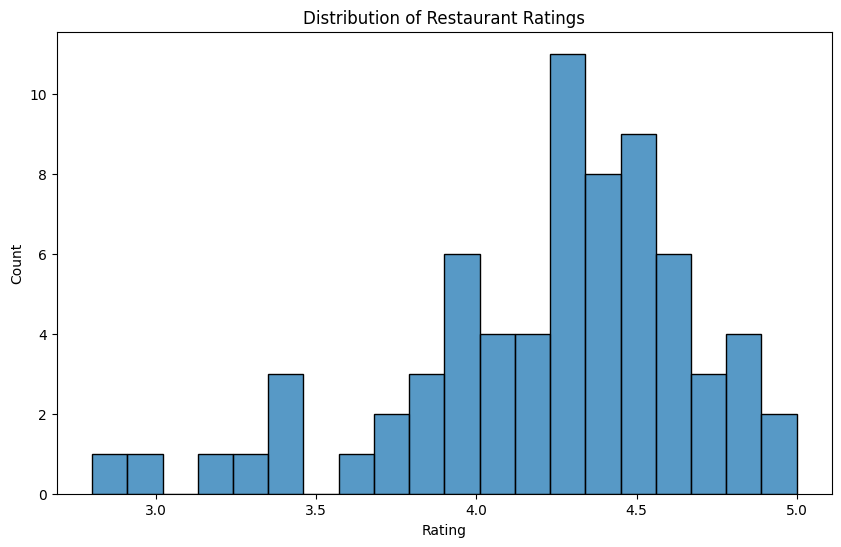

Distribution of price levels (by number of $ signs):
dollar_count
0    12
2     8
5     2
6    48
Name: count, dtype: int64


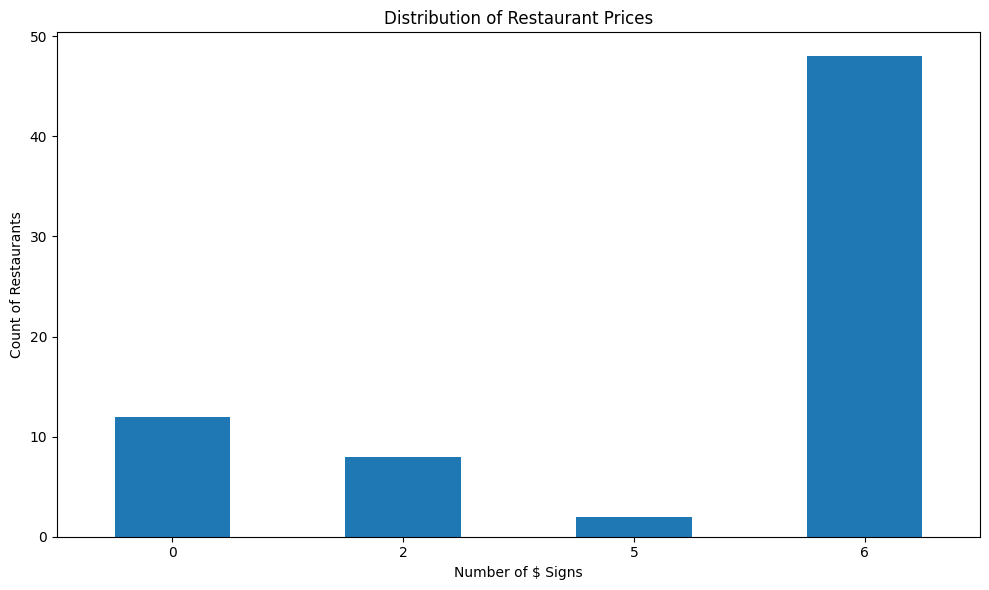


Average ratings by price level:
              mean  count
dollar_count             
0             4.32     12
2             4.22      8
5             4.75      2
6             4.18     48

Most Common Main Categories:
main_category
Mexican restaurant           41
Restaurant                   14
Taco restaurant               4
Latin American restaurant     2
Takeout restaurant            2
Name: count, dtype: int64

Restaurant Status:
status
Open  Closes 10 pm            12
Closed  Opens 4 pm             9
Closed  Opens 5 pm             6
Closed  Opens 6 pm             6
Open  Closes 11 pm             6
Open  Closes 12 am             3
Closed  Opens 5 pm Wed         3
Open  Closes 10:30 pm          3
Open  Closes 9 pm              3
Closed  Opens 6 pm Wed         2
Closed  Opens 6 pm Thu         2
Closed  Opens 3 pm             1
Open 24 hours                  1
Open  Closes 1 am              1
Closed  Opens 11:45 am Tue     1
Open  Closes 6:30 pm           1
Open  Closes 6 pm         

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics for ratings
print("Rating Statistics:")
print(mexican_restaurants['rating'].describe())

# Distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data=mexican_restaurants, x='rating', bins=20)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Add column with exact dollar count
mexican_restaurants['dollar_count'] = mexican_restaurants['price_range'].apply(count_dollars)

# Display distribution of exact dollar counts
print("Distribution of price levels (by number of $ signs):")
dollar_counts = mexican_restaurants['dollar_count'].value_counts().sort_index()
print(dollar_counts)

# Create a bar plot
plt.figure(figsize=(10, 6))
dollar_counts.plot(kind='bar')
plt.title('Distribution of Restaurant Prices')
plt.xlabel('Number of $ Signs')
plt.ylabel('Count of Restaurants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Average ratings by exact dollar count
print("\nAverage ratings by price level:")
avg_ratings = mexican_restaurants.groupby('dollar_count')['rating'].agg(['mean', 'count']).round(2)
print(avg_ratings)

# Top categories
print("\nMost Common Main Categories:")
print(mexican_restaurants['main_category'].value_counts().head())

# Restaurant status
print("\nRestaurant Status:")
print(mexican_restaurants['status'].value_counts())

# Advertising insights
print("\nRestaurants Spending on Ads:")
print(mexican_restaurants['is_spending_on_ads'].value_counts())

# Basic statistics for number of reviews
print("\nReview Count Statistics:")

print(mexican_restaurants['reviews'].describe())

In [5]:
# Create new dataframe with high-rated restaurants
high_rated_mexican = mexican_restaurants[
    (mexican_restaurants['rating'] > 4.3) & 
    (mexican_restaurants['reviews'] > 20)
].copy()

# Display basic info about the filtered dataset
print(f"Original number of Mexican restaurants: {len(mexican_restaurants)}")
print(f"Number of high-rated Mexican restaurants: {len(high_rated_mexican)}")



Original number of Mexican restaurants: 70
Number of high-rated Mexican restaurants: 32


/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/658165350.py:72: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity = combined_popularity[combined_popularity['status'] != 'unknown'].groupby(



Peak Hours by Day (30% or higher popularity):

Monday:
17:00 - 30.5% popularity (based on 554 restaurants)
18:00 - 35.4% popularity (based on 554 restaurants)
19:00 - 36.9% popularity (based on 554 restaurants)
20:00 - 33.2% popularity (based on 554 restaurants)

Tuesday:
17:00 - 31.7% popularity (based on 605 restaurants)
18:00 - 38.3% popularity (based on 605 restaurants)
19:00 - 40.8% popularity (based on 605 restaurants)
20:00 - 37.9% popularity (based on 605 restaurants)
21:00 - 30.7% popularity (based on 605 restaurants)

Wednesday:
17:00 - 30.8% popularity (based on 625 restaurants)
18:00 - 37.0% popularity (based on 625 restaurants)
19:00 - 39.2% popularity (based on 625 restaurants)
20:00 - 36.3% popularity (based on 625 restaurants)

Thursday:
17:00 - 36.8% popularity (based on 639 restaurants)
18:00 - 45.1% popularity (based on 639 restaurants)
19:00 - 48.1% popularity (based on 639 restaurants)
20:00 - 44.3% popularity (based on 639 restaurants)
21:00 - 35.5% popularity (b

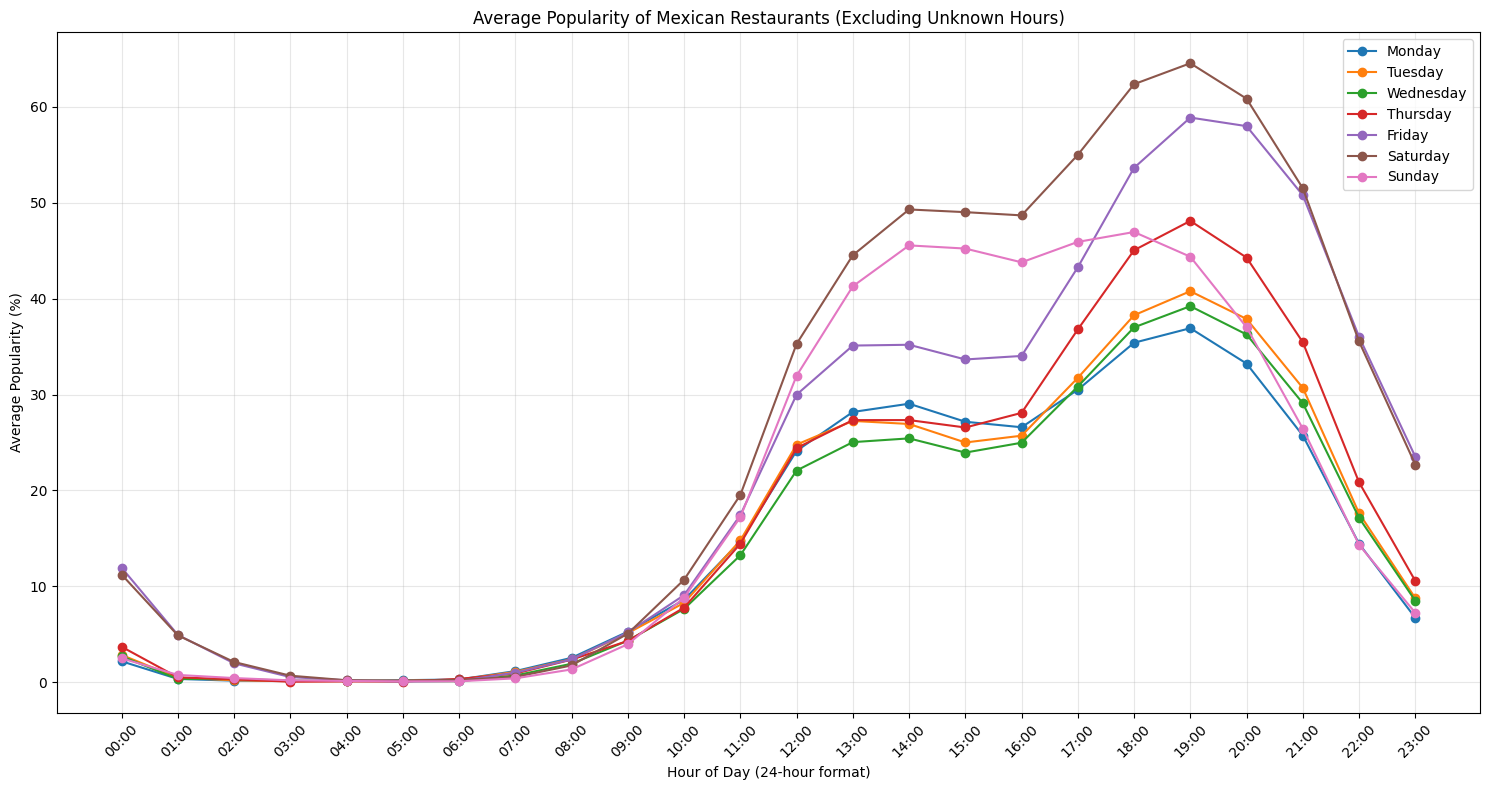

In [6]:
def create_enhanced_popularity_data(json_string):
    """
    Parse popularity data with a more nuanced approach to handling missing hours:
    - Known operating hours get actual popularity values
    - Known closed hours get 0
    - Unknown status hours are marked with None to exclude from averages
    Returns a DataFrame with all hours (0-23) for each day.
    """
    try:
        days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        template = []
        for day in days:
            for hour in range(24):
                template.append({
                    'day': day,
                    'hour': hour,
                    'time': f"{hour:02d}:00",
                    'popularity': None,  # Default to None instead of 0
                    'description': 'Unknown',
                    'status': 'unknown'
                })
        
        complete_df = pd.DataFrame(template)
        
        if json_string != "Not Present" and pd.notna(json_string):
            data = json.loads(json_string)
            
            for day, day_data in data.items():
                # First pass: Update known values
                for hour_data in day_data:
                    hour = hour_data['hour_of_day']
                    mask = (complete_df['day'] == day) & (complete_df['hour'] == hour)
                    complete_df.loc[mask, 'popularity'] = hour_data['popularity_percentage']
                    complete_df.loc[mask, 'description'] = hour_data['popularity_description']
                    complete_df.loc[mask, 'status'] = 'open'
                
                # Second pass: Identify likely closed hours
                # If we have data for a day but some hours are missing,
                # those are more likely to be closed hours
                if len(day_data) > 0:
                    day_mask = complete_df['day'] == day
                    null_mask = complete_df['popularity'].isnull()
                    complete_df.loc[day_mask & null_mask, 'status'] = 'closed'
                    complete_df.loc[day_mask & null_mask, 'popularity'] = 0
        
        # Sort by day and hour
        day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        complete_df['day'] = pd.Categorical(complete_df['day'], categories=day_order, ordered=True)
        complete_df = complete_df.sort_values(['day', 'hour']).reset_index(drop=True)
        
        return complete_df
    except Exception as e:
        print(f"Error parsing data: {e}")
        return None

# Process the data
all_popularity_data = []
high_rated_mexican_with_hours = high_rated_mexican[
    (high_rated_mexican['popular_times'] != "Not Present") & 
    (high_rated_mexican['popular_times'].notna())
].copy()

for _, restaurant in df.iterrows():
    pop_df = create_enhanced_popularity_data(restaurant['popular_times'])
    if pop_df is not None:
        all_popularity_data.append(pop_df)

# Combine all data
combined_popularity = pd.concat(all_popularity_data)

# Calculate average popularity by day and hour, excluding unknown status
avg_popularity = combined_popularity[combined_popularity['status'] != 'unknown'].groupby(
    ['day', 'hour']
).agg(
    mean_popularity=('popularity', 'mean'),
    count=('popularity', 'size')
).reset_index()

# Create visualization
plt.figure(figsize=(15, 8))

# Plot each day's data
for day in avg_popularity['day'].unique():
    day_data = avg_popularity[avg_popularity['day'] == day]
    plt.plot(
        day_data['hour'],
        day_data['mean_popularity'],
        label=f"{day}",
        marker='o'
    )

plt.grid(True, alpha=0.3)
plt.title('Average Popularity of Mexican Restaurants (Excluding Unknown Hours)')
plt.xlabel('Hour of Day (24-hour format)')
plt.ylabel('Average Popularity (%)')

plt.xticks(
    range(24),
    [f"{i:02d}:00" for i in range(24)],
    rotation=45
)

plt.legend()
plt.tight_layout()

# Print insights
print("\nPeak Hours by Day (30% or higher popularity):")
for day in avg_popularity['day'].unique():
    day_data = avg_popularity[avg_popularity['day'] == day]
    peak_hours = day_data[day_data['mean_popularity'] >= 30]
    if not peak_hours.empty:
        print(f"\n{day}:")
        for _, row in peak_hours.iterrows():
            print(f"{row['hour']:02d}:00 - {row['mean_popularity']:.1f}% popularity (based on {row['count']} restaurants)")

# Location analysis



In [9]:
high_restaurants = df[
    (df['rating'] > 4.4) & 
    (df['reviews'] > 20)
].copy()



Original number of Mexican restaurants: 784
Number of high-rated Mexican restaurants: 322


In [13]:
import folium

#%%
# Create interactive map showing all restaurants
amsterdam_map = folium.Map(
    location=[52.3676, 4.9041],  # Amsterdam center
    zoom_start=13,
    tiles='cartodbpositron'  # Clean, modern map style
)

# Add markers for each restaurant
for idx, row in df.iterrows():
    if pd.notnull(row['latitude']) and pd.notnull(row['longitude']):
        # Color code: orange for Mexican, blue for others
        color = 'orange' if row['is_mexican'] else 'blue'
        
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=8,
            popup=folium.Popup(
                f"""
                <b>{row['name']}</b><br>
                {'🌮 Mexican Restaurant<br>' if row['is_mexican'] else ''}
                Rating: {row['rating']}<br>
                Address: {row['address']}<br>
                """,
                max_width=300
            ),
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7,
            weight=2
        ).add_to(amsterdam_map)

# Add a legend
legend_html = '''
<div style="position: fixed; 
            bottom: 50px; right: 50px; width: 150px; height: 90px; 
            border:2px solid grey; z-index:9999; font-size:14px;
            background-color:white;
            padding: 10px;
            border-radius: 5px;">
    <p><span style="color:orange;">●</span> Mexican Restaurants</p>
    <p><span style="color:blue;">●</span> Other Restaurants</p>
</div>
'''
amsterdam_map.get_root().html.add_child(folium.Element(legend_html))

# Save the map
amsterdam_map.save('amsterdam_restaurants_map.html')
print("Map saved as 'amsterdam_restaurants_map.html'")

Map saved as 'amsterdam_restaurants_map.html'


In [34]:
import pandas as pd
from shapely.geometry import Point, Polygon

def get_neighborhood_from_coordinates(lat, lon, neighborhoods_df):
    """
    Determine which neighborhood a point belongs to using its coordinates.
    Uses a simple point-in-polygon check based on the WKT coordinates.
    """
    if pd.isna(lat) or pd.isna(lon):
        return None
    
    point = Point(lon, lat)
    
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT_LNG_LAT string to Polygon
        try:
            # Extract coordinates from WKT string and create polygon
            coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
            coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
            polygon = Polygon(coords)
            
            if polygon.contains(point):
                return {
                    'neighborhood': row['Wijk'],
                    'area': row['Gebied'],
                    'district': row['Stadsdeel']
                }
        except Exception as e:
            continue
            
    return None

def add_neighborhood_categorization(df):
    """
    Add neighborhood information to each restaurant in the DataFrame.
    
    Args:
        df: DataFrame containing restaurant data with 'latitude' and 'longitude' columns
    
    Returns:
        DataFrame with added neighborhood columns
    """
    print("Loading neighborhood data...")
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Add neighborhood information to each restaurant
    print("Categorizing restaurants by neighborhood...")
    neighborhood_info = df.apply(
        lambda x: get_neighborhood_from_coordinates(x['latitude'], x['longitude'], neighborhoods_df),
        axis=1
    )
    
    # Extract neighborhood information
    df['neighborhood'] = neighborhood_info.apply(lambda x: x['neighborhood'] if x else None)
    df['area'] = neighborhood_info.apply(lambda x: x['area'] if x else None)
    df['district'] = neighborhood_info.apply(lambda x: x['district'] if x else None)
    
    print("\nNeighborhood assignment complete.")
    print(f"Restaurants assigned to neighborhoods: {df['neighborhood'].notna().sum()}")
    print(f"Restaurants without neighborhood assignment: {df['neighborhood'].isna().sum()}")
    
    return df

# Usage example:
df = add_neighborhood_categorization(df)


Loading neighborhood data...
Categorizing restaurants by neighborhood...

Neighborhood assignment complete.
Restaurants assigned to neighborhoods: 783
Restaurants without neighborhood assignment: 1


In [40]:
import folium
from shapely.wkt import loads

def create_amsterdam_map(df, neighborhoods_df):
    """
    Create an interactive map of Amsterdam with neighborhood boundaries.
    
    Args:
        df: DataFrame containing restaurant data
        neighborhoods_df: DataFrame containing neighborhood boundary data
    
    Returns:
        folium.Map object
    """
    # Create base map centered on Amsterdam
    amsterdam_map = folium.Map(
        location=[52.3676, 4.9041],  # Amsterdam center coordinates
        zoom_start=12
    )
    
    # Add neighborhood boundaries
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT string to coordinates
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        # Draw polygon for each neighborhood
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='blue',
            weight=2,
            fill=True,
            fill_color='blue',
            fill_opacity=0.2,
            popup=f"Neighborhood: {row['Wijk']}<br>Area: {row['Gebied']}<br>District: {row['Stadsdeel']}"
        ).add_to(amsterdam_map)
    
    # Add restaurants as markers (optional)
    for _, restaurant in df.iterrows():
        if pd.notna(restaurant['latitude']) and pd.notna(restaurant['longitude']):
            folium.CircleMarker(
                location=[restaurant['latitude'], restaurant['longitude']],
                radius=3,
                color='red',
                fill=True,
                popup=f"Name: {restaurant['name']}<br>Neighborhood: {restaurant['neighborhood']}"
            ).add_to(amsterdam_map)
    
    return amsterdam_map

# Usage example:
def visualize_neighborhoods():
    """
    Create and save an interactive map of Amsterdam neighborhoods.
    """
    # Load data if not already loaded
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Create map
    print("Creating Amsterdam map with neighborhood boundaries...")
    amsterdam_map = create_amsterdam_map(df, neighborhoods_df)
    
    # Save map to HTML file
    map_file = 'amsterdam_neighborhoods.html'
    amsterdam_map.save(map_file)
    print(f"Map saved as '{map_file}'")
    
    return amsterdam_map

amsterdam_map = visualize_neighborhoods()

Creating Amsterdam map with neighborhood boundaries...
Map saved as 'amsterdam_neighborhoods.html'


In [49]:
import pandas as pd
import folium
from shapely.geometry import Point, Polygon
from folium.plugins import MarkerCluster
import branca.colormap as cm


def create_amsterdam_map(df, neighborhoods_df, neighborhood_stats=None):
    """
    Create an interactive map of Amsterdam with neighborhood boundaries, ratings, and restaurants.
    """
    # Create base map centered on Amsterdam
    amsterdam_map = folium.Map(
        location=[52.3676, 4.9041],
        zoom_start=12
    )
    
    # Create a marker cluster group
    marker_cluster = MarkerCluster().add_to(amsterdam_map)
    
    if neighborhood_stats is not None:
        # Create color scale based on ratings
        min_rating = neighborhood_stats['avg_rating'].min()
        max_rating = neighborhood_stats['avg_rating'].max()
        colormap = cm.LinearColormap(
            colors=['red', 'yellow', 'green'],
            vmin=min_rating,
            vmax=max_rating
        )
        amsterdam_map.add_child(colormap)
    
    # Add neighborhood boundaries
    for _, row in neighborhoods_df.iterrows():
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        if neighborhood_stats is not None:
            stats = neighborhood_stats.loc[row['Wijk']] if row['Wijk'] in neighborhood_stats.index else None
            color = colormap(stats['avg_rating']) if stats is not None else 'gray'
            
            if stats is not None:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: {stats['avg_rating']:.2f}<br>"
                    f"Number of Restaurants: {int(stats['total_restaurants'])}"
                )
            else:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: N/A<br>"
                    f"Number of Restaurants: 0"
                )
        else:
            color = 'blue'
            popup_text = f"Neighborhood: {row['Wijk']}<br>Area: {row['Gebied']}<br>District: {row['Stadsdeel']}"
        
        # Draw polygon for each neighborhood
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            popup=popup_text
        ).add_to(amsterdam_map)
    
    # Add restaurants as markers
    for _, restaurant in df.iterrows():
        if pd.notna(restaurant['latitude']) and pd.notna(restaurant['longitude']):
            popup_content = (
                f"<b>{restaurant['name']}</b><br>"
                f"Rating: {restaurant['rating']:.1f}<br>"
                f"Reviews: {restaurant['reviews']}<br>"
                f"Neighborhood: {restaurant.get('neighborhood', 'Unknown')}"
            )
            
            color = 'red' if restaurant['rating'] < 3.5 else 'orange' if restaurant['rating'] < 4 else 'green'
            
            folium.CircleMarker(
                location=[restaurant['latitude'], restaurant['longitude']],
                radius=3,
                color=color,
                fill=True,
                popup=popup_content,
                fill_opacity=0.7
            ).add_to(marker_cluster)
    
    # Add legend
    legend_html = '''
        <div style="position: fixed; 
                    bottom: 50px; right: 50px; width: 150px; height: 90px; 
                    border:2px solid grey; z-index:9999; background-color:white;
                    padding:10px;
                    font-size:14px;">
        <p><b>Restaurant Ratings</b></p>
        <p>
        <i class="fa fa-circle" style="color:green"></i> ≥ 4.0<br>
        <i class="fa fa-circle" style="color:orange"></i> 3.5-4.0<br>
        <i class="fa fa-circle" style="color:red"></i> < 3.5
        </p>
        </div>
    '''
    amsterdam_map.get_root().html.add_child(folium.Element(legend_html))
    
    return amsterdam_map

def analyze_neighborhood_ratings(df):
    """
    Analyze the relationship between neighborhoods and restaurant ratings.
    """
    print("Analyzing neighborhood ratings...")
    
    neighborhood_stats = df.groupby('neighborhood').agg({
        'name': 'count',
        'rating': ['mean', 'std', 'median', 'count'],
        'reviews': 'mean'
    }).round(2)
    
    neighborhood_stats.columns = [
        'total_restaurants',
        'avg_rating',
        'rating_std',
        'median_rating',
        'rated_restaurants',
        'avg_reviews'
    ]
    
    neighborhood_stats = neighborhood_stats.sort_values('avg_rating', ascending=False)
    
    return neighborhood_stats

def visualize_neighborhoods_with_ratings():
    """
    Create and save an interactive map of Amsterdam neighborhoods with ratings.
    """
    # Load neighborhood data
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Get neighborhood statistics
    neighborhood_stats = analyze_neighborhood_ratings(df)
    
    # Create map
    print("\nCreating Amsterdam map with neighborhood ratings...")
    amsterdam_map = create_amsterdam_map(df, neighborhoods_df, neighborhood_stats)
    
    # Save map to HTML file
    map_file = 'amsterdam_neighborhoods_ratings.html'
    amsterdam_map.save(map_file)
    print(f"Map saved as '{map_file}'")
    
    return amsterdam_map

# Create and save the map with ratings
amsterdam_map = visualize_neighborhoods_with_ratings()

Analyzing neighborhood ratings...

Creating Amsterdam map with neighborhood ratings...
Map saved as 'amsterdam_neighborhoods_ratings.html'


Analyzing neighborhood ratings...

Overall Statistics:
Total neighborhoods: 70
Average neighborhood rating: 4.32

Top 10 Highest-Rated Neighborhoods:
                                  total_restaurants  avg_rating  rating_std  \
neighborhood                                                                  
Westindische Buurt                                2        4.80        0.00   
Transvaalbuurt                                    2        4.70        0.14   
Frederik Hendrikbuurt                             4        4.68        0.13   
Elzenhagen                                        4        4.68        0.25   
Nieuwendammerdijk/Buiksloterdijk                  1        4.60         NaN   
Overtoomse Sluis                                  8        4.55        0.16   
Staatsliedenbuurt                                 8        4.55        0.17   
Geuzenbuurt                                       4        4.55        0.24   
Zuid Pijp                                         6        4

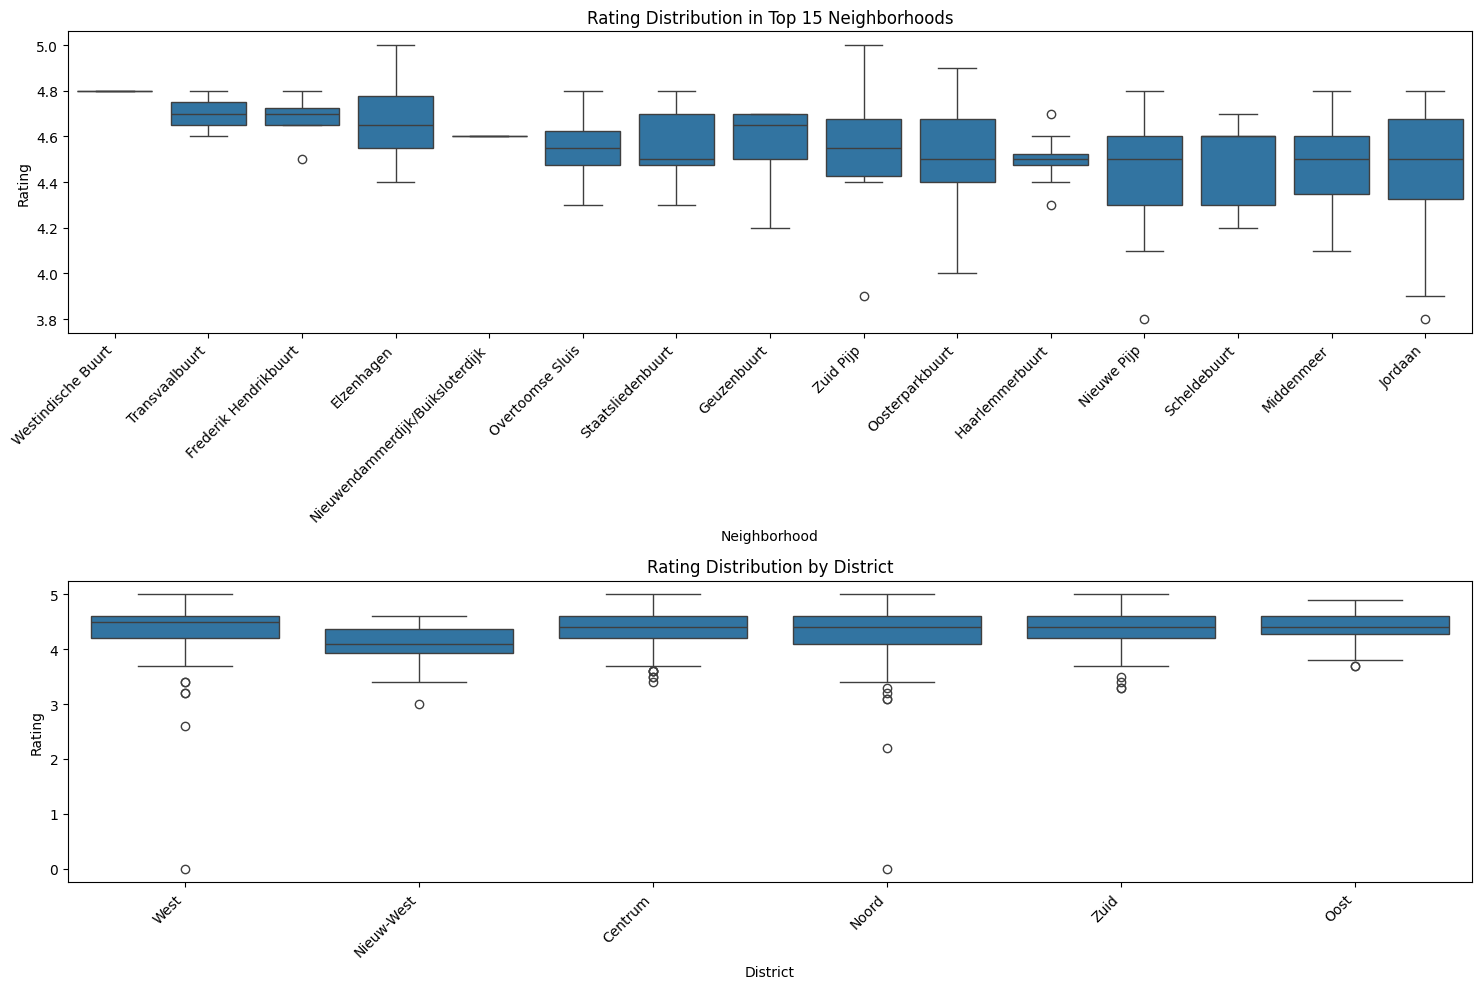


Statistical Analysis:
One-way ANOVA test for rating differences between neighborhoods:
F-statistic: nan
p-value: nan

One-way ANOVA test for rating differences between districts:
F-statistic: nan
p-value: nan

Creating Amsterdam map with neighborhood ratings (no restaurants)...

Creating Amsterdam map with neighborhood ratings and restaurants...


/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/3468231149.py:200: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*rating_groups)
/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/3468231149.py:209: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat_dist, p_value_dist = stats.f_oneway(*district_groups)


Maps saved as 'amsterdam_neighborhoods_only.html' and 'amsterdam_neighborhoods_restaurants.html'


In [51]:
def create_amsterdam_map(df, neighborhoods_df, neighborhood_stats=None, include_restaurants=True):
    """
    Create an interactive map of Amsterdam with neighborhood boundaries, ratings, and optionally restaurants.
    """
    import folium
    from shapely.wkt import loads
    import branca.colormap as cm
    from folium.plugins import MarkerCluster
    from folium.features import DivIcon
    
    # Create base map centered on Amsterdam
    amsterdam_map = folium.Map(
        location=[52.3676, 4.9041],
        zoom_start=12
    )
    
    # Create a marker cluster group for better performance with many markers
    marker_cluster = MarkerCluster().add_to(amsterdam_map)
    
    if neighborhood_stats is not None:
        # Create color scale based on ratings
        rating_colormap = cm.LinearColormap(
            colors=['red', 'yellow', 'green'],
            vmin=neighborhood_stats['avg_rating'].min(),
            vmax=neighborhood_stats['avg_rating'].max(),
            caption='Average Rating'
        )
        amsterdam_map.add_child(rating_colormap)
    
    # Add neighborhood boundaries
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT string to coordinates
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        # Get neighborhood stats if available
        if neighborhood_stats is not None:
            stats = neighborhood_stats.loc[row['Wijk']] if row['Wijk'] in neighborhood_stats.index else None
            color = rating_colormap(stats['avg_rating']) if stats is not None else 'gray'
            
            # Calculate center of polygon for label placement
            center_lat = sum(lat for lon, lat in coords) / len(coords)
            center_lon = sum(lon for lon, lat in coords) / len(coords)
            
            # Create popup text based on whether stats exist
            if stats is not None:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: {stats['avg_rating']:.2f}<br>"
                    f"Average Reviews: {stats['avg_reviews']:.0f}<br>"
                    f"Number of Restaurants: {int(stats['total_restaurants'])}"
                )
                
                # Add text label for average reviews
                folium.map.Marker(
                    [center_lat, center_lon],
                    icon=DivIcon(
                        icon_size=(150,36),
                        icon_anchor=(75,18),
                        html=f'<div style="font-size: 12pt; color: black; font-weight: bold; text-align: center;">{stats["avg_reviews"]:.0f}</div>'
                    )
                ).add_to(amsterdam_map)
            else:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: N/A<br>"
                    f"Average Reviews: N/A<br>"
                    f"Number of Restaurants: 0"
                )
        else:
            color = 'blue'
            popup_text = f"Neighborhood: {row['Wijk']}<br>Area: {row['Gebied']}<br>District: {row['Stadsdeel']}"
        
        # Draw polygon for each neighborhood
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            popup=popup_text
        ).add_to(amsterdam_map)
    
    # Add restaurants as markers if include_restaurants is True
    if include_restaurants:
        for _, restaurant in df.iterrows():
            if pd.notna(restaurant['latitude']) and pd.notna(restaurant['longitude']):
                # Create popup content
                popup_content = (
                    f"<b>{restaurant['name']}</b><br>"
                    f"Rating: {restaurant['rating']:.1f}<br>"
                    f"Reviews: {restaurant['reviews']}<br>"
                    f"Neighborhood: {restaurant['neighborhood']}"
                )
                
                # Create marker with color based on rating
                color = 'red' if restaurant['rating'] < 3.5 else 'orange' if restaurant['rating'] < 4 else 'green'
                
                folium.CircleMarker(
                    location=[restaurant['latitude'], restaurant['longitude']],
                    radius=3,
                    color=color,
                    fill=True,
                    popup=popup_content,
                    fill_opacity=0.7
                ).add_to(marker_cluster)
    
        # Add a legend for restaurant ratings
        legend_html = '''
            <div style="position: fixed; 
                        bottom: 50px; right: 50px; width: 150px; height: 90px; 
                        border:2px solid grey; z-index:9999; background-color:white;
                        padding:10px;
                        font-size:14px;
                        ">
            <p><b>Restaurant Ratings</b></p>
            <p>
            <i class="fa fa-circle" style="color:green"></i> ≥ 4.0<br>
            <i class="fa fa-circle" style="color:orange"></i> 3.5-4.0<br>
            <i class="fa fa-circle" style="color:red"></i> < 3.5
            </p>
            </div>
            '''
        amsterdam_map.get_root().html.add_child(folium.Element(legend_html))
    
    return amsterdam_map

def analyze_neighborhood_ratings(df):
    """
    Analyze the relationship between neighborhoods and restaurant ratings/success.
    """
    print("Analyzing neighborhood ratings...")
    
    # Calculate neighborhood statistics
    neighborhood_stats = df.groupby('neighborhood').agg({
        'name': 'count',
        'rating': ['mean', 'std', 'median', 'count'],
        'reviews': 'mean'
    }).round(2)
    
    # Flatten column names
    neighborhood_stats.columns = [
        'total_restaurants',
        'avg_rating',
        'rating_std',
        'median_rating',
        'rated_restaurants',
        'avg_reviews'
    ]
    
    # Sort by average rating (for top/bottom analysis)
    neighborhood_stats = neighborhood_stats.sort_values('avg_rating', ascending=False)
    
    # Print summary statistics
    print("\nOverall Statistics:")
    print(f"Total neighborhoods: {len(neighborhood_stats)}")
    print(f"Average neighborhood rating: {neighborhood_stats['avg_rating'].mean():.2f}")
    
    # Top neighborhoods
    print("\nTop 10 Highest-Rated Neighborhoods:")
    print(neighborhood_stats.head(10)[['total_restaurants', 'avg_rating', 'rating_std', 'avg_reviews']])
    
    # Bottom neighborhoods
    print("\nBottom 10 Lowest-Rated Neighborhoods:")
    print(neighborhood_stats.tail(10)[['total_restaurants', 'avg_rating', 'rating_std', 'avg_reviews']])
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Rating Distribution by Neighborhood (Box Plot)
    plt.subplot(2, 1, 1)
    sns.boxplot(data=df, x='neighborhood', y='rating', order=neighborhood_stats.index[:15])
    plt.xticks(rotation=45, ha='right')
    plt.title('Rating Distribution in Top 15 Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Rating')
    
    # Plot 2: Rating Distribution by District
    plt.subplot(2, 1, 2)
    sns.boxplot(data=df, x='district', y='rating')
    plt.xticks(rotation=45, ha='right')
    plt.title('Rating Distribution by District')
    plt.xlabel('District')
    plt.ylabel('Rating')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    print("\nStatistical Analysis:")
    
    # ANOVA test to check if ratings differ significantly between neighborhoods
    neighborhoods = df['neighborhood'].unique()
    rating_groups = [df[df['neighborhood'] == n]['rating'] for n in neighborhoods]
    f_stat, p_value = stats.f_oneway(*rating_groups)
    
    print(f"One-way ANOVA test for rating differences between neighborhoods:")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    # ANOVA test for districts
    districts = df['district'].unique()
    district_groups = [df[df['district'] == d]['rating'] for d in districts]
    f_stat_dist, p_value_dist = stats.f_oneway(*district_groups)
    
    print(f"\nOne-way ANOVA test for rating differences between districts:")
    print(f"F-statistic: {f_stat_dist:.2f}")
    print(f"p-value: {p_value_dist:.4f}")
    
    return neighborhood_stats

def visualize_neighborhoods_with_ratings():
    """
    Create and save two interactive maps of Amsterdam neighborhoods.
    """
    # Load neighborhood data
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Get neighborhood statistics
    neighborhood_stats = analyze_neighborhood_ratings(df)
    
    # Create map without restaurants
    print("\nCreating Amsterdam map with neighborhood ratings (no restaurants)...")
    neighborhoods_map = create_amsterdam_map(df, neighborhoods_df, neighborhood_stats, include_restaurants=False)
    neighborhoods_map.save('amsterdam_neighborhoods_only.html')
    
    # Create map with restaurants
    print("\nCreating Amsterdam map with neighborhood ratings and restaurants...")
    full_map = create_amsterdam_map(df, neighborhoods_df, neighborhood_stats, include_restaurants=True)
    full_map.save('amsterdam_neighborhoods_restaurants.html')
    
    print("Maps saved as 'amsterdam_neighborhoods_only.html' and 'amsterdam_neighborhoods_restaurants.html'")
    
    return neighborhoods_map, full_map

# Create and save both maps
neighborhoods_map, full_map = visualize_neighborhoods_with_ratings()

Analyzing neighborhood ratings...

Overall Statistics:
Total neighborhoods: 34
Average neighborhood rating: 4.24

Top 10 Highest-Rated Neighborhoods:
                            total_restaurants  avg_rating  rating_std  \
neighborhood                                                            
Landlust                                    3        4.77        0.15   
Grachtengordel-West                         1        4.70         NaN   
Haarlemmerbuurt                             1        4.70         NaN   
Scheldebuurt                                1        4.60         NaN   
Transvaalbuurt                              1        4.60         NaN   
Dapperbuurt                                 2        4.60        0.28   
Noordelijke IJ-oevers-West                  3        4.53        0.21   
Overtoomse Sluis                            1        4.50         NaN   
Van Lennepbuurt                             1        4.50         NaN   
Slotervaart-Noord                           1  

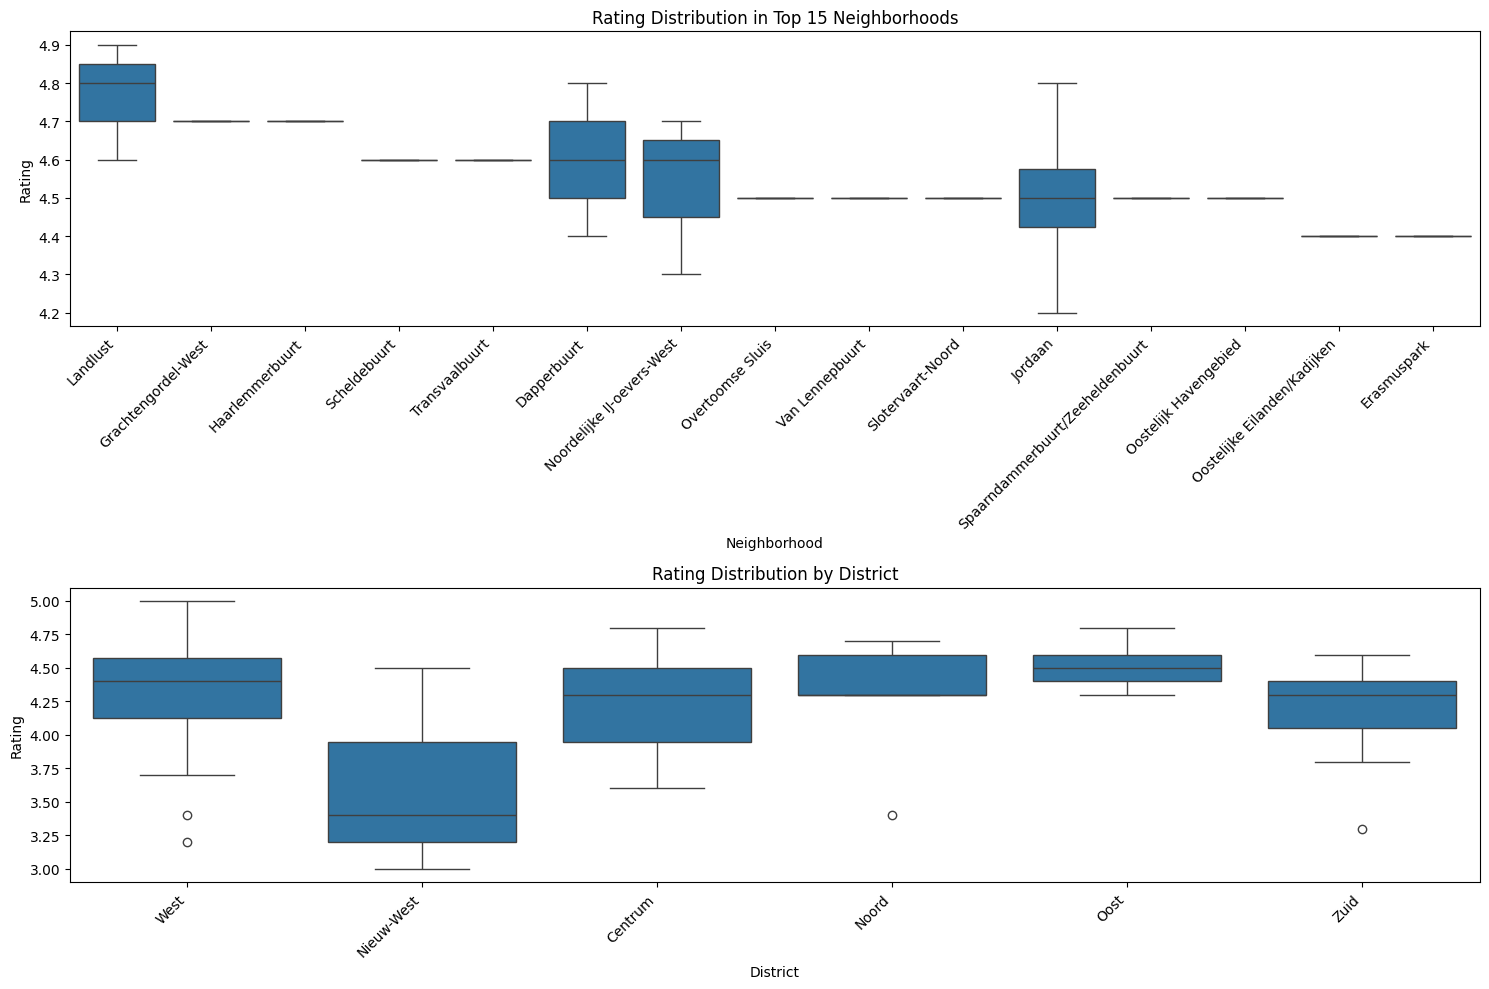


Statistical Analysis:
One-way ANOVA test for rating differences between neighborhoods:
F-statistic: nan
p-value: nan

One-way ANOVA test for rating differences between districts:
F-statistic: nan
p-value: nan

Creating Amsterdam map with neighborhood ratings (no restaurants)...

Creating Amsterdam map with neighborhood ratings and restaurants...


/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/3057194675.py:200: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*rating_groups)
/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/3057194675.py:209: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat_dist, p_value_dist = stats.f_oneway(*district_groups)


Maps saved as 'amsterdam_neighborhoods_only.html' and 'amsterdam_neighborhoods_restaurants.html'


In [52]:
def create_amsterdam_map(df, neighborhoods_df, neighborhood_stats=None, include_restaurants=True):
    """
    Create an interactive map of Amsterdam with neighborhood boundaries, ratings, and optionally restaurants.
    """
    import folium
    from shapely.wkt import loads
    import branca.colormap as cm
    from folium.plugins import MarkerCluster
    from folium.features import DivIcon
    
    # Create base map centered on Amsterdam
    amsterdam_map = folium.Map(
        location=[52.3676, 4.9041],
        zoom_start=12
    )
    
    # Create a marker cluster group for better performance with many markers
    marker_cluster = MarkerCluster().add_to(amsterdam_map)
    
    if neighborhood_stats is not None:
        # Create color scale based on ratings
        rating_colormap = cm.LinearColormap(
            colors=['red', 'yellow', 'green'],
            vmin=neighborhood_stats['avg_rating'].min(),
            vmax=neighborhood_stats['avg_rating'].max(),
            caption='Average Rating'
        )
        amsterdam_map.add_child(rating_colormap)
    
    # Add neighborhood boundaries
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT string to coordinates
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        # Get neighborhood stats if available
        if neighborhood_stats is not None:
            stats = neighborhood_stats.loc[row['Wijk']] if row['Wijk'] in neighborhood_stats.index else None
            color = rating_colormap(stats['avg_rating']) if stats is not None else 'gray'
            
            # Calculate center of polygon for label placement
            center_lat = sum(lat for lon, lat in coords) / len(coords)
            center_lon = sum(lon for lon, lat in coords) / len(coords)
            
            # Create popup text based on whether stats exist
            if stats is not None:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: {stats['avg_rating']:.2f}<br>"
                    f"Average Reviews: {stats['avg_reviews']:.0f}<br>"
                    f"Number of Restaurants: {int(stats['total_restaurants'])}"
                )
                
                # Add text label for average reviews
                folium.map.Marker(
                    [center_lat, center_lon],
                    icon=DivIcon(
                        icon_size=(150,36),
                        icon_anchor=(75,18),
                        html=f'<div style="font-size: 12pt; color: black; font-weight: bold; text-align: center;">{stats["avg_reviews"]:.0f}</div>'
                    )
                ).add_to(amsterdam_map)
            else:
                popup_text = (
                    f"Neighborhood: {row['Wijk']}<br>"
                    f"Area: {row['Gebied']}<br>"
                    f"District: {row['Stadsdeel']}<br>"
                    f"Average Rating: N/A<br>"
                    f"Average Reviews: N/A<br>"
                    f"Number of Restaurants: 0"
                )
        else:
            color = 'blue'
            popup_text = f"Neighborhood: {row['Wijk']}<br>Area: {row['Gebied']}<br>District: {row['Stadsdeel']}"
        
        # Draw polygon for each neighborhood
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.4,
            popup=popup_text
        ).add_to(amsterdam_map)
    
    # Add restaurants as markers if include_restaurants is True
    if include_restaurants:
        for _, restaurant in df.iterrows():
            if pd.notna(restaurant['latitude']) and pd.notna(restaurant['longitude']):
                # Create popup content
                popup_content = (
                    f"<b>{restaurant['name']}</b><br>"
                    f"Rating: {restaurant['rating']:.1f}<br>"
                    f"Reviews: {restaurant['reviews']}<br>"
                    f"Neighborhood: {restaurant['neighborhood']}"
                )
                
                # Create marker with color based on rating
                color = 'red' if restaurant['rating'] < 3.5 else 'orange' if restaurant['rating'] < 4 else 'green'
                
                folium.CircleMarker(
                    location=[restaurant['latitude'], restaurant['longitude']],
                    radius=3,
                    color=color,
                    fill=True,
                    popup=popup_content,
                    fill_opacity=0.7
                ).add_to(marker_cluster)
    
        # Add a legend for restaurant ratings
        legend_html = '''
            <div style="position: fixed; 
                        bottom: 50px; right: 50px; width: 150px; height: 90px; 
                        border:2px solid grey; z-index:9999; background-color:white;
                        padding:10px;
                        font-size:14px;
                        ">
            <p><b>Restaurant Ratings</b></p>
            <p>
            <i class="fa fa-circle" style="color:green"></i> ≥ 4.0<br>
            <i class="fa fa-circle" style="color:orange"></i> 3.5-4.0<br>
            <i class="fa fa-circle" style="color:red"></i> < 3.5
            </p>
            </div>
            '''
        amsterdam_map.get_root().html.add_child(folium.Element(legend_html))
    
    return amsterdam_map

def analyze_neighborhood_ratings(df):
    """
    Analyze the relationship between neighborhoods and restaurant ratings/success.
    """
    print("Analyzing neighborhood ratings...")
    
    # Calculate neighborhood statistics
    neighborhood_stats = df.groupby('neighborhood').agg({
        'name': 'count',
        'rating': ['mean', 'std', 'median', 'count'],
        'reviews': 'mean'
    }).round(2)
    
    # Flatten column names
    neighborhood_stats.columns = [
        'total_restaurants',
        'avg_rating',
        'rating_std',
        'median_rating',
        'rated_restaurants',
        'avg_reviews'
    ]
    
    # Sort by average rating (for top/bottom analysis)
    neighborhood_stats = neighborhood_stats.sort_values('avg_rating', ascending=False)
    
    # Print summary statistics
    print("\nOverall Statistics:")
    print(f"Total neighborhoods: {len(neighborhood_stats)}")
    print(f"Average neighborhood rating: {neighborhood_stats['avg_rating'].mean():.2f}")
    
    # Top neighborhoods
    print("\nTop 10 Highest-Rated Neighborhoods:")
    print(neighborhood_stats.head(10)[['total_restaurants', 'avg_rating', 'rating_std', 'avg_reviews']])
    
    # Bottom neighborhoods
    print("\nBottom 10 Lowest-Rated Neighborhoods:")
    print(neighborhood_stats.tail(10)[['total_restaurants', 'avg_rating', 'rating_std', 'avg_reviews']])
    
    # Visualizations
    plt.figure(figsize=(15, 10))
    
    # Plot 1: Rating Distribution by Neighborhood (Box Plot)
    plt.subplot(2, 1, 1)
    sns.boxplot(data=df, x='neighborhood', y='rating', order=neighborhood_stats.index[:15])
    plt.xticks(rotation=45, ha='right')
    plt.title('Rating Distribution in Top 15 Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Rating')
    
    # Plot 2: Rating Distribution by District
    plt.subplot(2, 1, 2)
    sns.boxplot(data=df, x='district', y='rating')
    plt.xticks(rotation=45, ha='right')
    plt.title('Rating Distribution by District')
    plt.xlabel('District')
    plt.ylabel('Rating')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical tests
    print("\nStatistical Analysis:")
    
    # ANOVA test to check if ratings differ significantly between neighborhoods
    neighborhoods = df['neighborhood'].unique()
    rating_groups = [df[df['neighborhood'] == n]['rating'] for n in neighborhoods]
    f_stat, p_value = stats.f_oneway(*rating_groups)
    
    print(f"One-way ANOVA test for rating differences between neighborhoods:")
    print(f"F-statistic: {f_stat:.2f}")
    print(f"p-value: {p_value:.4f}")
    
    # ANOVA test for districts
    districts = df['district'].unique()
    district_groups = [df[df['district'] == d]['rating'] for d in districts]
    f_stat_dist, p_value_dist = stats.f_oneway(*district_groups)
    
    print(f"\nOne-way ANOVA test for rating differences between districts:")
    print(f"F-statistic: {f_stat_dist:.2f}")
    print(f"p-value: {p_value_dist:.4f}")
    
    return neighborhood_stats

def visualize_neighborhoods_with_ratings(df):
    """
    Create and save two interactive maps of Amsterdam neighborhoods.
    """
    # Load neighborhood data
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Get neighborhood statistics
    neighborhood_stats = analyze_neighborhood_ratings(df)
    
    # Create map without restaurants
    print("\nCreating Amsterdam map with neighborhood ratings (no restaurants)...")
    neighborhoods_map = create_amsterdam_map(df, neighborhoods_df, neighborhood_stats, include_restaurants=False)
    neighborhoods_map.save('mexican_neighborhoods_only.html')
    
    # Create map with restaurants
    print("\nCreating Amsterdam map with neighborhood ratings and restaurants...")
    full_map = create_amsterdam_map(df, neighborhoods_df, neighborhood_stats, include_restaurants=True)
    full_map.save('mexican_neighborhoods_restaurants.html')
    
    print("Maps saved as 'amsterdam_neighborhoods_only.html' and 'amsterdam_neighborhoods_restaurants.html'")
    
    return neighborhoods_map, full_map

# Create and save both maps
mexican_with_loc = df[df['is_mexican'] == True]
neighborhoods_map, full_map = visualize_neighborhoods_with_ratings(mexican_with_loc)

In [48]:
import folium
from shapely.wkt import loads

def create_amsterdam_map(df, neighborhoods_df):
    """
    Create an interactive map of Amsterdam with neighborhood boundaries.
    
    Args:
        df: DataFrame containing restaurant data
        neighborhoods_df: DataFrame containing neighborhood boundary data
    
    Returns:
        folium.Map object
    """
    # Create base map centered on Amsterdam
    amsterdam_map = folium.Map(
        location=[52.3676, 4.9041],  # Amsterdam center coordinates
        zoom_start=12
    )
    
    # Add neighborhood boundaries
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT string to coordinates
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        # Draw polygon for each neighborhood
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='blue',
            weight=2,
            fill=True,
            fill_color='blue',
            fill_opacity=0.2,
            popup=f"Neighborhood: {row['Wijk']}<br>Area: {row['Gebied']}<br>District: {row['Stadsdeel']}"
        ).add_to(amsterdam_map)
    
    # Add restaurants as markers (optional)
    for _, restaurant in df.iterrows():
        if pd.notna(restaurant['latitude']) and pd.notna(restaurant['longitude']):
            folium.CircleMarker(
                location=[restaurant['latitude'], restaurant['longitude']],
                radius=3,
                color='red',
                fill=True,
                popup=f"Name: {restaurant['name']}<br>Neighborhood: {restaurant['neighborhood']}"
            ).add_to(amsterdam_map)
    
    return amsterdam_map

# Usage example:
def visualize_neighborhoods(df):
    """
    Create and save an interactive map of Amsterdam neighborhoods.
    """
    # Load data if not already loaded
    neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')
    
    # Create map
    print("Creating Amsterdam map with neighborhood boundaries...")
    amsterdam_map = create_amsterdam_map(df, neighborhoods_df)
    
    # Save map to HTML file
    map_file = 'amsterdam_neighborhoods.html'
    amsterdam_map.save(map_file)
    print(f"Map saved as '{map_file}'")
    
    return amsterdam_map

mexican_with_loc = df[df['is_mexican'] == True]
amsterdam_map = visualize_neighborhoods(mexican_with_loc)

Creating Amsterdam map with neighborhood boundaries...
Map saved as 'amsterdam_neighborhoods.html'


Starting analysis...
=== Neighborhood Success Analysis ===

Total number of neighborhoods: 70
Average success score across all restaurants: 0.455
Success score standard deviation: 0.053

Top 10 Most Successful Neighborhoods:
                                  avg_success  avg_rating  avg_reviews  \
neighborhood                                                             
De Weteringschans                       0.493       4.430     2352.185   
Transvaalbuurt                          0.487       4.700      799.500   
Westindische Buurt                      0.486       4.800      259.500   
Nieuwendammerdijk/Buiksloterdijk        0.484       4.600     1134.000   
Frederik Hendrikbuurt                   0.484       4.675      786.000   
Jordaan                                 0.482       4.456     1715.167   
Overtoomse Sluis                        0.473       4.550      862.625   
Haarlemmerbuurt                         0.471       4.500     1001.250   
Willemspark                        

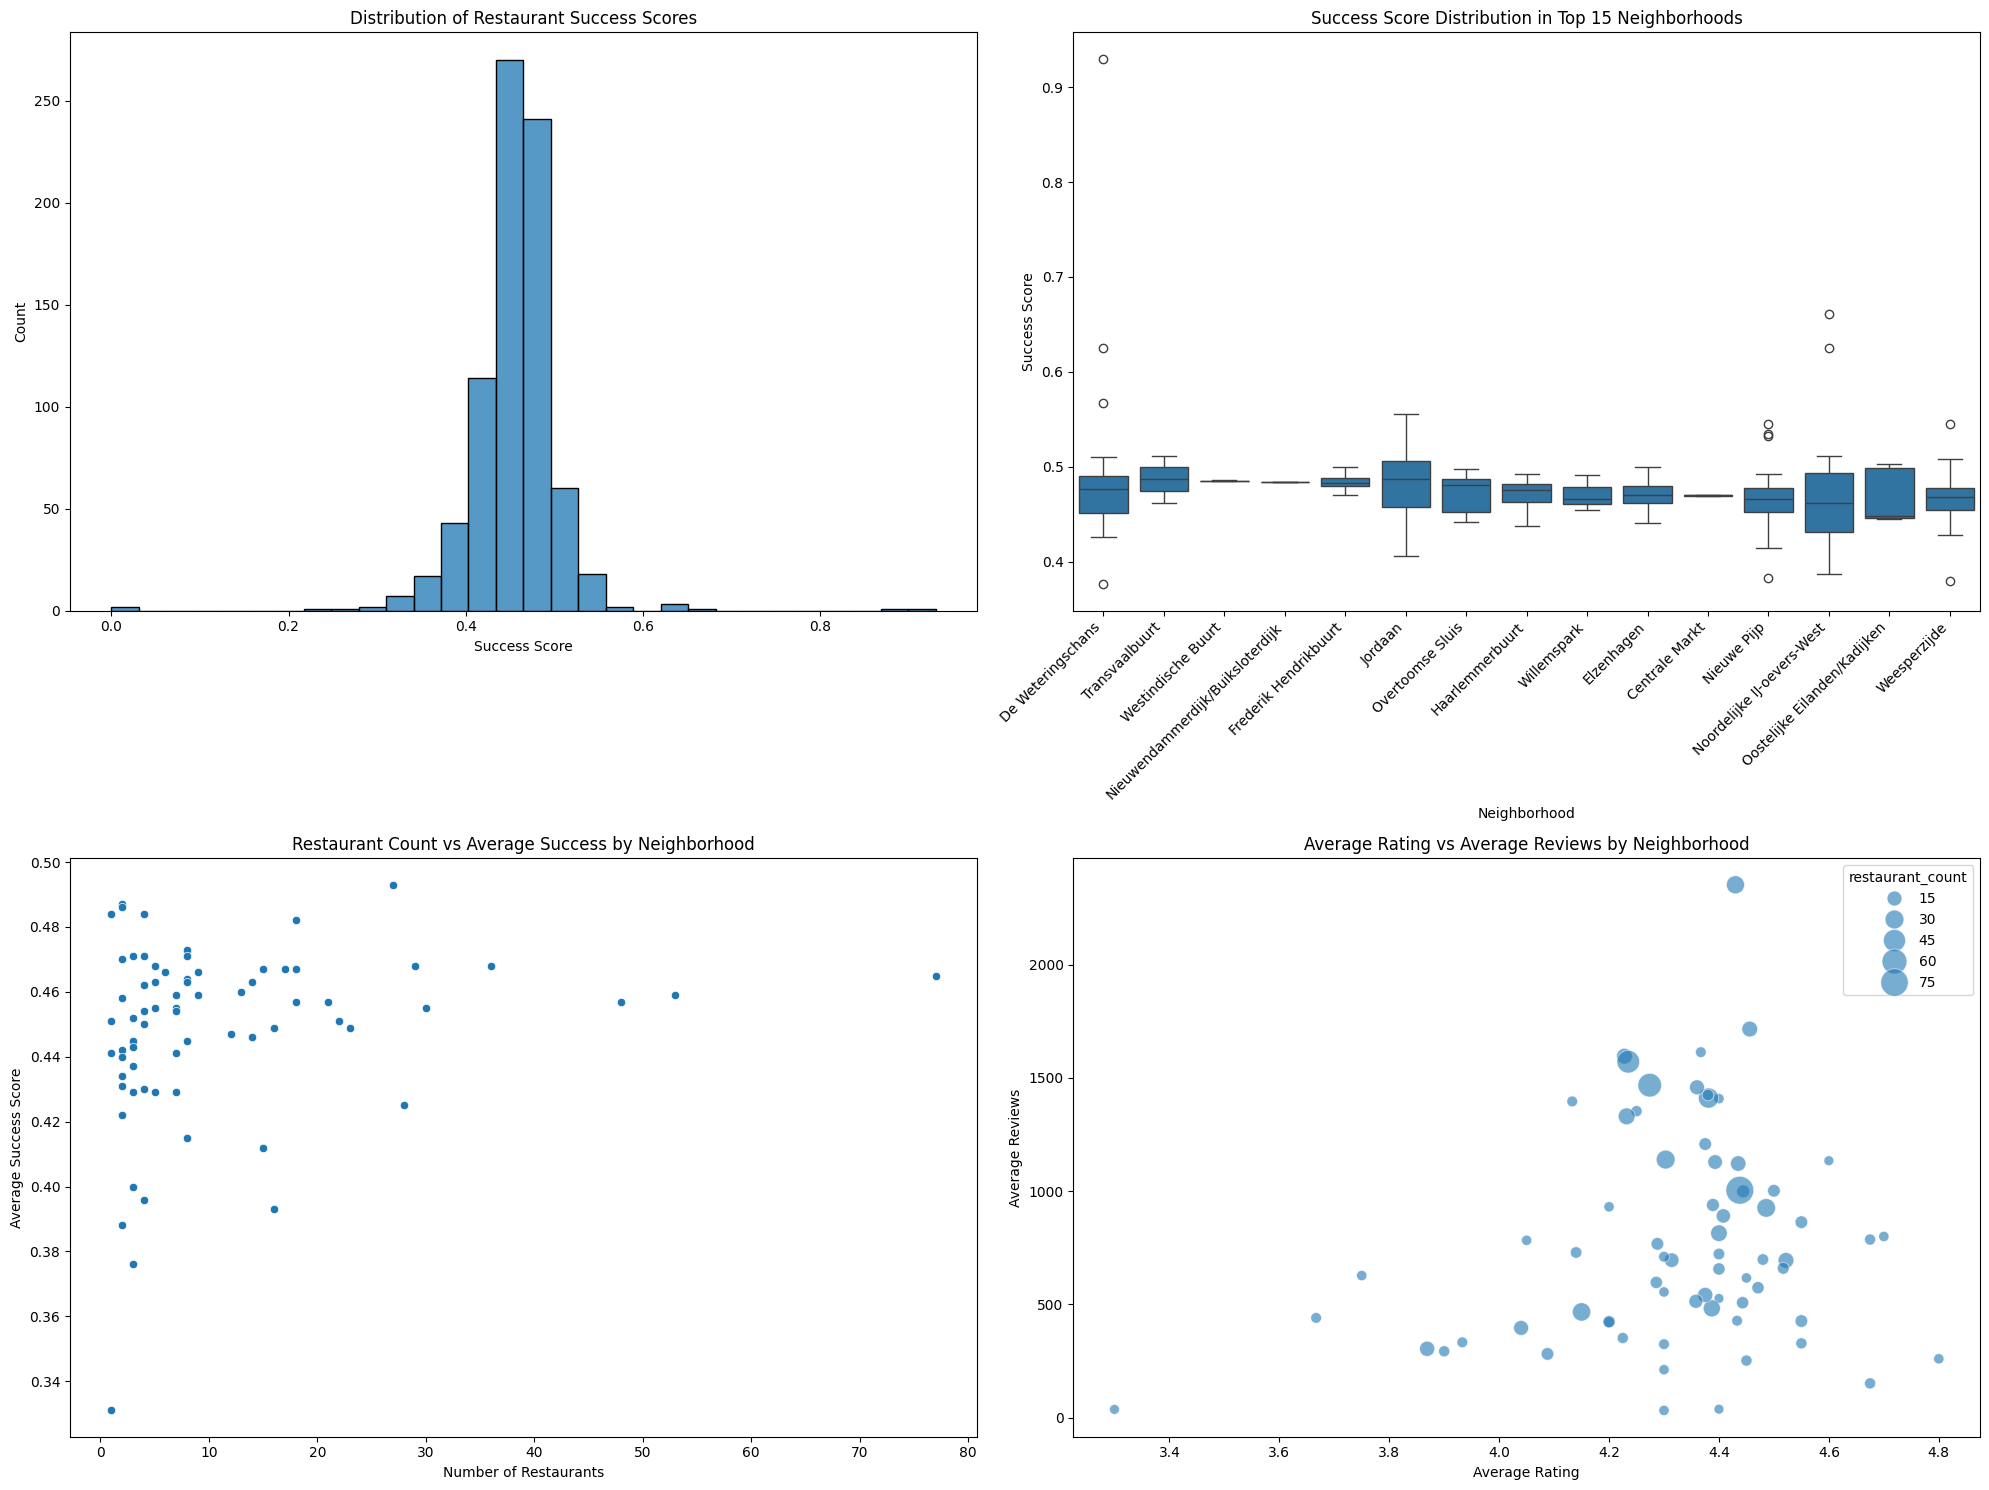


=== Statistical Analysis ===

One-way ANOVA test for success differences between neighborhoods:
F-statistic: nan
p-value: nan
There is no statistically significant difference in success between neighborhoods

Correlation Matrix:
                  avg_success  restaurant_count  avg_rating  avg_reviews
avg_success             1.000             0.205       0.935        0.530
restaurant_count        0.205             1.000       0.063        0.417
avg_rating              0.935             0.063       1.000        0.196
avg_reviews             0.530             0.417       0.196        1.000
Analysis completed successfully!


/var/folders/sr/07bzjx_j3z54yxqyj206926w0000gn/T/ipykernel_71473/2986361942.py:103: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = stats.f_oneway(*success_groups)


In [63]:
# Imports
import pandas as pd
import numpy as np
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the neighborhood data
neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')

# The rest of the function remains the same
def analyze_restaurant_success_by_neighborhood(df, neighborhoods_df):
    """
    Analyze how neighborhoods relate to restaurant success using a combined metric of ratings and reviews.
    """
    print("Starting analysis...")
    
    # Create success metrics
    df['normalized_reviews'] = (df['reviews'] - df['reviews'].min()) / (df['reviews'].max() - df['reviews'].min())
    df['success_score'] = (df['rating'] / 5 * 0.5) + (df['normalized_reviews'] * 0.5)
    
    # Analyze by neighborhood
    neighborhood_success = df.groupby('neighborhood').agg({
        'success_score': ['mean', 'std', 'count'],
        'rating': 'mean',
        'reviews': ['mean', 'count'],
        'normalized_reviews': 'mean'
    }).round(3)
    
    # Flatten column names
    neighborhood_success.columns = [
        'avg_success', 'success_std', 'restaurant_count',
        'avg_rating', 'avg_reviews', 'review_count', 'avg_norm_reviews'
    ]
    
    # Sort by success score
    neighborhood_success = neighborhood_success.sort_values('avg_success', ascending=False)
    
    # Print summary statistics
    print("=== Neighborhood Success Analysis ===")
    print(f"\nTotal number of neighborhoods: {len(neighborhood_success)}")
    print(f"Average success score across all restaurants: {df['success_score'].mean():.3f}")
    print(f"Success score standard deviation: {df['success_score'].std():.3f}")
    
    print("\nTop 10 Most Successful Neighborhoods:")
    print(neighborhood_success.head(10)[['avg_success', 'avg_rating', 'avg_reviews', 'restaurant_count']])
    
    print("\nBottom 10 Least Successful Neighborhoods:")
    print(neighborhood_success.tail(10)[['avg_success', 'avg_rating', 'avg_reviews', 'restaurant_count']])
    
    # Visualizations
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Success Score Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='success_score', bins=30)
    plt.title('Distribution of Restaurant Success Scores')
    plt.xlabel('Success Score')
    plt.ylabel('Count')
    
    # Plot 2: Success Score by Neighborhood (top 15)
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='neighborhood', y='success_score', 
                order=neighborhood_success.head(15).index)
    plt.xticks(rotation=45, ha='right')
    plt.title('Success Score Distribution in Top 15 Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Success Score')
    
    # Plot 3: Restaurant Count vs Average Success
    plt.subplot(2, 2, 3)
    sns.scatterplot(data=neighborhood_success, 
                    x='restaurant_count', 
                    y='avg_success')
    plt.title('Restaurant Count vs Average Success by Neighborhood')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Average Success Score')
    
    # Plot 4: Average Rating vs Average Reviews
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=neighborhood_success, 
                    x='avg_rating', 
                    y='avg_reviews',
                    size='restaurant_count',
                    sizes=(50, 400),
                    alpha=0.6)
    plt.title('Average Rating vs Average Reviews by Neighborhood')
    plt.xlabel('Average Rating')
    plt.ylabel('Average Reviews')
    
    plt.tight_layout()
    plt.show()
    
    # Statistical Analysis
    print("\n=== Statistical Analysis ===")
    
    # ANOVA test for neighborhood effect on success
    neighborhoods = df['neighborhood'].unique()
    success_groups = [df[df['neighborhood'] == n]['success_score'] for n in neighborhoods]
    try:
        f_stat, p_value = stats.f_oneway(*success_groups)
        print("\nOne-way ANOVA test for success differences between neighborhoods:")
        print(f"F-statistic: {f_stat:.2f}")
        print(f"p-value: {p_value:.4e}")
        
        if p_value < 0.05:
            print("There is a statistically significant difference in success between neighborhoods")
        else:
            print("There is no statistically significant difference in success between neighborhoods")
    except Exception as e:
        print(f"Error in ANOVA test: {e}")
    
    # Correlation analysis
    correlations = neighborhood_success[['avg_success', 'restaurant_count', 'avg_rating', 'avg_reviews']].corr()
    print("\nCorrelation Matrix:")
    print(correlations.round(3))
    
    # Create success map
    success_map = folium.Map(location=[52.3676, 4.9041], zoom_start=12)
    
    # Create color scale for success score
    success_colormap = cm.LinearColormap(
        colors=['red', 'yellow', 'green'],
        vmin=neighborhood_success['avg_success'].min(),
        vmax=neighborhood_success['avg_success'].max(),
        caption='Average Success Score'
    )
    
    # Add neighborhoods colored by success score
    for _, row in neighborhoods_df.iterrows():
        # Convert WKT string to coordinates
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        # Get neighborhood success stats
        if row['Wijk'] in neighborhood_success.index:
            stats_data = neighborhood_success.loc[row['Wijk']]
            color = success_colormap(stats_data['avg_success'])
            
            popup_text = (
                f"Neighborhood: {row['Wijk']}<br>"
                f"Success Score: {stats_data['avg_success']:.3f}<br>"
                f"Average Rating: {stats_data['avg_rating']:.2f}<br>"
                f"Average Reviews: {stats_data['avg_reviews']:.0f}<br>"
                f"Number of Restaurants: {stats_data['restaurant_count']}"
            )
        else:
            color = 'gray'
            popup_text = f"Neighborhood: {row['Wijk']}<br>No restaurants"
        
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(success_map)
    
    success_map.add_child(success_colormap)
    success_map.save('neighborhood_success_map.html')
    
    return neighborhood_success, df

# Run the analysis
try:
    neighborhood_success, df_with_success = analyze_restaurant_success_by_neighborhood(df, neighborhoods_df)
    print("Analysis completed successfully!")
except Exception as e:
    print(f"Error during analysis: {e}")

Starting analysis...

=== Basic Statistics ===
Total number of restaurants: 784
Average success score: 0.455
Success score standard deviation: 0.053

Top 10 Most Successful Neighborhoods:
                                  avg_success  avg_rating  avg_reviews  \
neighborhood                                                             
De Weteringschans                       0.493       4.430     2352.185   
Transvaalbuurt                          0.487       4.700      799.500   
Westindische Buurt                      0.486       4.800      259.500   
Nieuwendammerdijk/Buiksloterdijk        0.484       4.600     1134.000   
Frederik Hendrikbuurt                   0.484       4.675      786.000   
Jordaan                                 0.482       4.456     1715.167   
Overtoomse Sluis                        0.473       4.550      862.625   
Haarlemmerbuurt                         0.471       4.500     1001.250   
Willemspark                             0.471       4.367     1613.000  

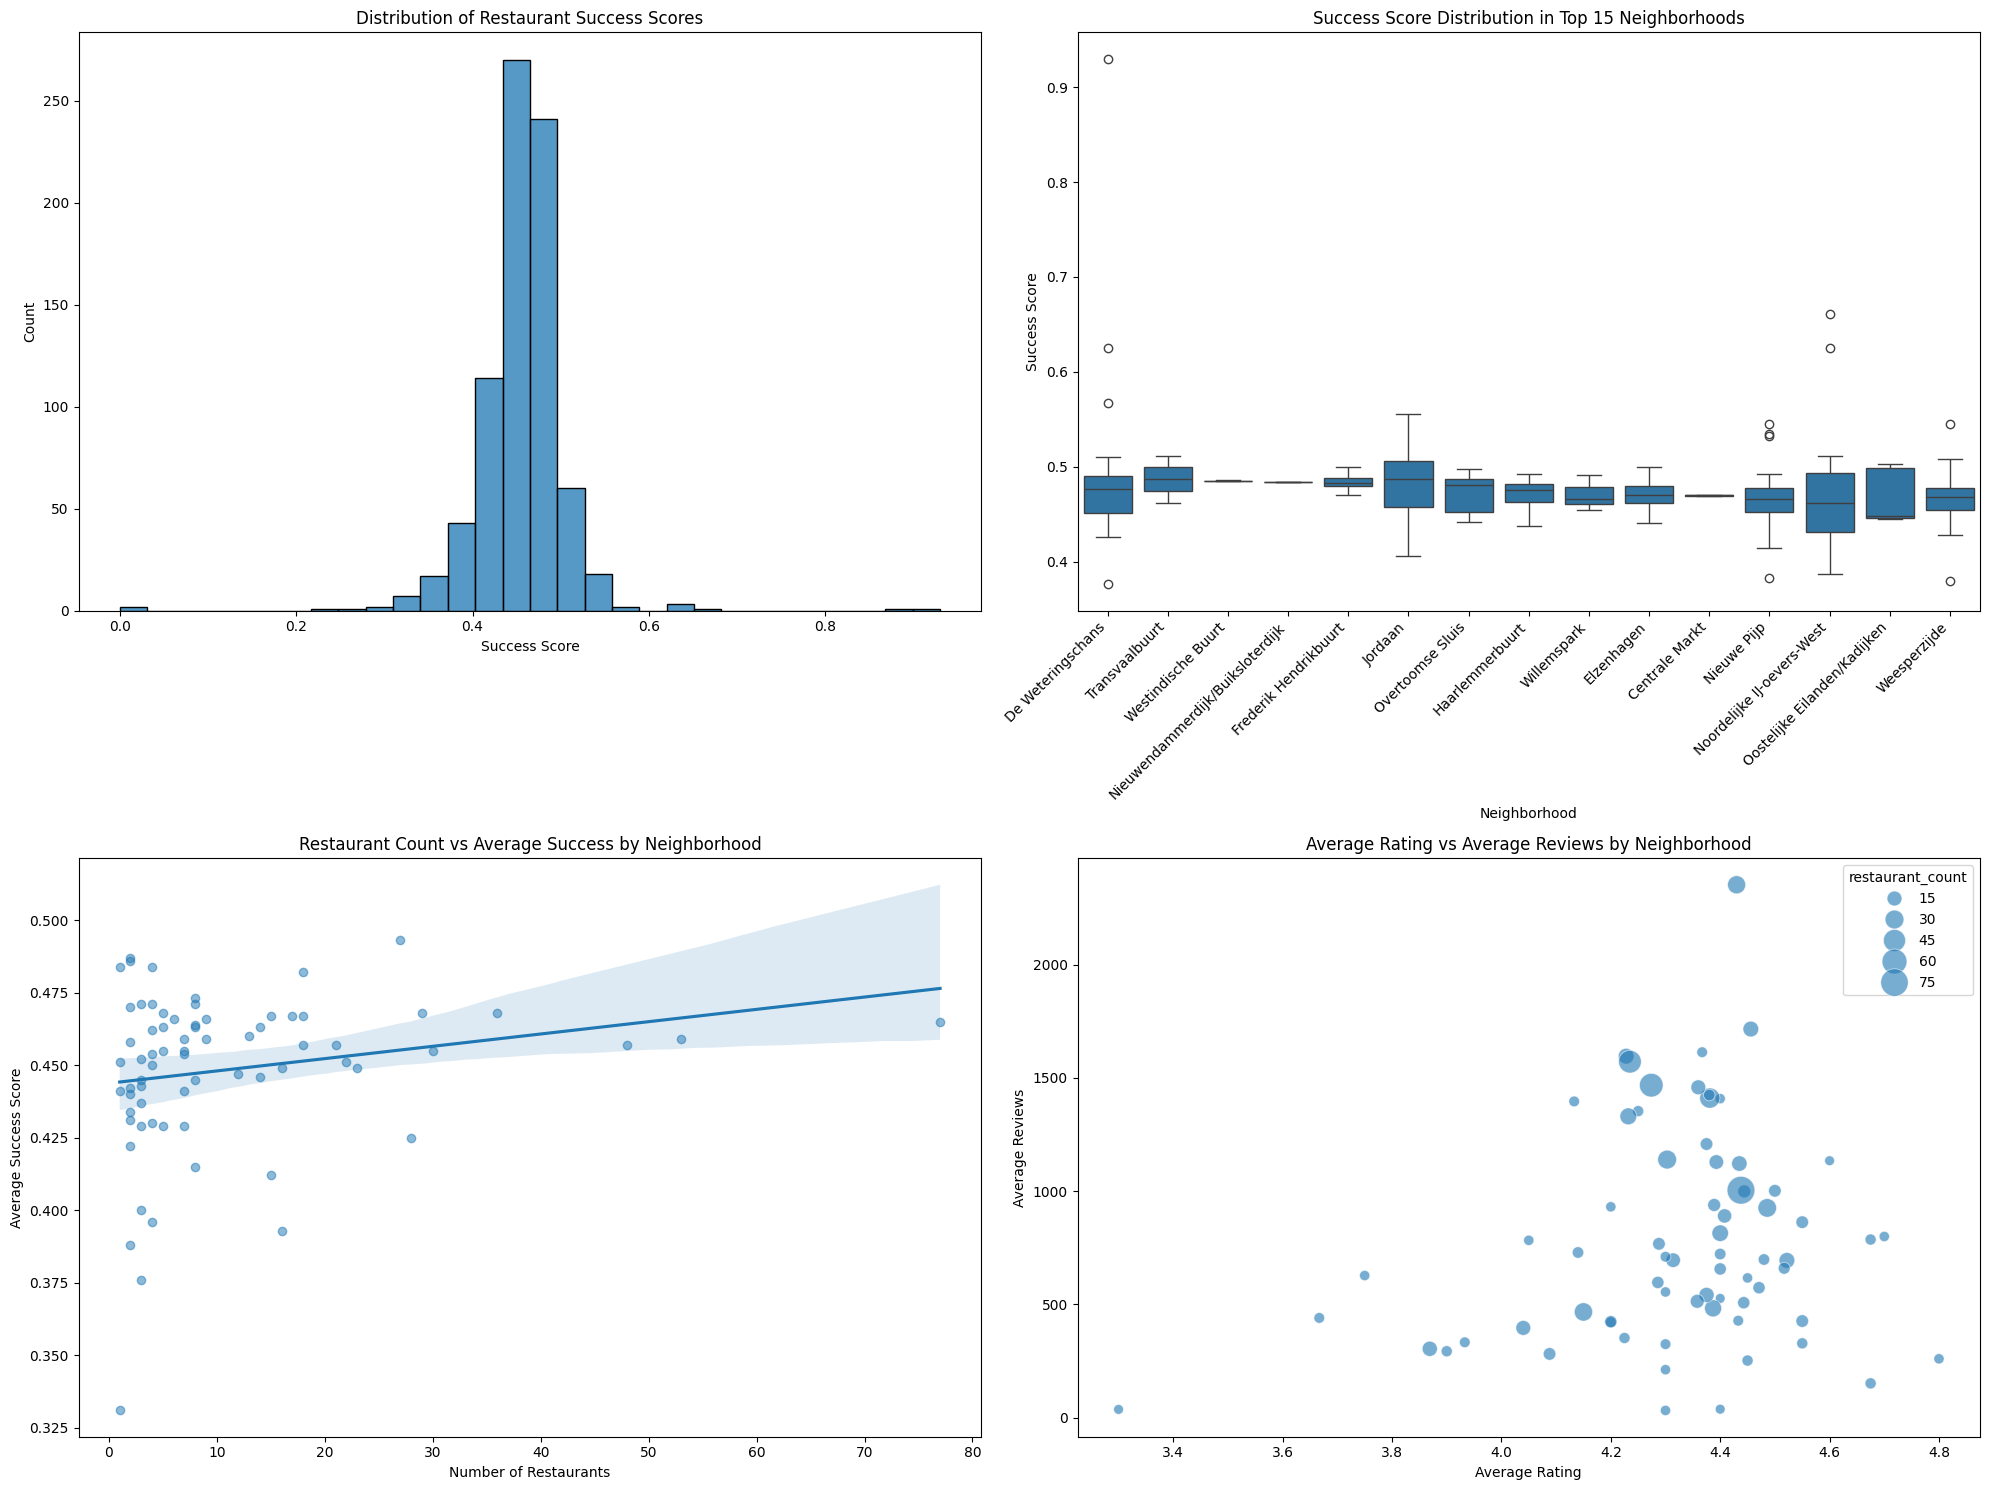


=== Detailed Statistical Analysis ===

Sample size analysis:
Number of neighborhoods: 70
Average restaurants per neighborhood: 11.2
Median restaurants per neighborhood: 7.0

Neighborhoods with less than 5 restaurants:
neighborhood
Apollobuurt                         3
Banne Buiksloot                     3
Buitenveldert-Oost                  1
Buitenveldert-West                  2
Centrale Markt                      2
Elzenhagen                          4
Erasmuspark                         3
Frederik Hendrikbuurt               4
Geuzenbuurt                         4
Houthavens                          1
IJburg-West                         4
IJplein/Vogelbuurt                  2
Indische Buurt-Oost                 2
Nieuwendammerdijk/Buiksloterdijk    1
Omval/Overamstel                    4
Osdorp-Midden                       3
Osdorp-Oost                         2
Overtoomse Veld                     2
Rijnbuurt                           2
Schinkelbuurt                       3
Sloterdi

In [67]:
# Imports
import pandas as pd
import numpy as np
import folium
import branca.colormap as cm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the neighborhood data
neighborhoods_df = pd.read_csv('data/INDELING_WIJK.csv', sep=';')

def analyze_restaurant_success_by_neighborhood(df, neighborhoods_df):
    """
    Analyze how neighborhoods relate to restaurant success using a combined metric of ratings and reviews.
    """
    print("Starting analysis...")
    
    # Create success metrics
    df['normalized_reviews'] = (df['reviews'] - df['reviews'].min()) / (df['reviews'].max() - df['reviews'].min())
    df['success_score'] = (df['rating'] / 5 * 0.5) + (df['normalized_reviews'] * 0.5)
    
    # Analyze by neighborhood
    neighborhood_success = df.groupby('neighborhood').agg({
        'success_score': ['mean', 'std', 'count'],
        'rating': 'mean',
        'reviews': ['mean', 'count'],
        'normalized_reviews': 'mean'
    }).round(3)
    
    # Flatten column names
    neighborhood_success.columns = [
        'avg_success', 'success_std', 'restaurant_count',
        'avg_rating', 'avg_reviews', 'review_count', 'avg_norm_reviews'
    ]
    
    # Sort by success score
    neighborhood_success = neighborhood_success.sort_values('avg_success', ascending=False)
    
    # Print summary statistics
    print("\n=== Basic Statistics ===")
    print(f"Total number of restaurants: {len(df)}")
    print(f"Average success score: {df['success_score'].mean():.3f}")
    print(f"Success score standard deviation: {df['success_score'].std():.3f}")
    
    print("\nTop 10 Most Successful Neighborhoods:")
    print(neighborhood_success.head(10)[['avg_success', 'avg_rating', 'avg_reviews', 'restaurant_count']])
    
    print("\nBottom 10 Least Successful Neighborhoods:")
    print(neighborhood_success.tail(10)[['avg_success', 'avg_rating', 'avg_reviews', 'restaurant_count']])
    
    # Visualizations
    plt.figure(figsize=(20, 15))
    
    # Plot 1: Success Score Distribution
    plt.subplot(2, 2, 1)
    sns.histplot(data=df, x='success_score', bins=30)
    plt.title('Distribution of Restaurant Success Scores')
    plt.xlabel('Success Score')
    plt.ylabel('Count')
    
    # Plot 2: Success Score by Neighborhood (top 15)
    plt.subplot(2, 2, 2)
    sns.boxplot(data=df, x='neighborhood', y='success_score', 
                order=neighborhood_success.head(15).index)
    plt.xticks(rotation=45, ha='right')
    plt.title('Success Score Distribution in Top 15 Neighborhoods')
    plt.xlabel('Neighborhood')
    plt.ylabel('Success Score')
    
    # Plot 3: Restaurant Count vs Average Success
    plt.subplot(2, 2, 3)
    sns.regplot(data=neighborhood_success, 
                x='restaurant_count', 
                y='avg_success',
                scatter_kws={'alpha':0.5})
    plt.title('Restaurant Count vs Average Success by Neighborhood')
    plt.xlabel('Number of Restaurants')
    plt.ylabel('Average Success Score')
    
    # Plot 4: Average Rating vs Average Reviews
    plt.subplot(2, 2, 4)
    sns.scatterplot(data=neighborhood_success, 
                    x='avg_rating', 
                    y='avg_reviews',
                    size='restaurant_count',
                    sizes=(50, 400),
                    alpha=0.6)
    plt.title('Average Rating vs Average Reviews by Neighborhood')
    plt.xlabel('Average Rating')
    plt.ylabel('Average Reviews')
    
    plt.tight_layout()
    plt.show()
    
    # Enhanced Statistical Analysis
    print("\n=== Detailed Statistical Analysis ===")
    
    # Sample size analysis
    neighborhood_counts = df.groupby('neighborhood').size()
    print("\nSample size analysis:")
    print(f"Number of neighborhoods: {len(neighborhood_counts)}")
    print(f"Average restaurants per neighborhood: {neighborhood_counts.mean():.1f}")
    print(f"Median restaurants per neighborhood: {neighborhood_counts.median():.1f}")
    print("\nNeighborhoods with less than 5 restaurants:")
    print(neighborhood_counts[neighborhood_counts < 5])
    
    # ANOVA test for neighborhoods with sufficient data
    min_restaurants = 3
    valid_neighborhoods = neighborhood_counts[neighborhood_counts >= min_restaurants].index
    
    if len(valid_neighborhoods) >= 2:
        success_groups = [df[df['neighborhood'] == n]['success_score'] for n in valid_neighborhoods]
        try:
            f_stat, p_value = stats.f_oneway(*success_groups)
            print(f"\nOne-way ANOVA test for neighborhoods with {min_restaurants}+ restaurants:")
            print(f"Number of neighborhoods included: {len(valid_neighborhoods)}")
            print(f"F-statistic: {f_stat:.2f}")
            print(f"p-value: {p_value:.4e}")
            
            if p_value < 0.05:
                print("There is a statistically significant difference in success between neighborhoods")
                
                # Post-hoc analysis
                tukey = pairwise_tukeyhsd(df[df['neighborhood'].isin(valid_neighborhoods)]['success_score'],
                                        df[df['neighborhood'].isin(valid_neighborhoods)]['neighborhood'])
                print("\nPost-hoc Tukey test results (showing only significant differences p<0.05):")
                significant_pairs = tukey.summary().data[1:]
                for row in significant_pairs:
                    if float(row[3]) < 0.05:
                        print(f"{row[0]} vs {row[1]}: diff={float(row[2]):.3f}, p={float(row[3]):.4f}")
            else:
                print("There is no statistically significant difference in success between neighborhoods")
        except Exception as e:
            print(f"Error in ANOVA test: {e}")
    else:
        print("\nNot enough neighborhoods with sufficient data for ANOVA test")
    
    # Correlation analysis with significance tests
    print("\nCorrelation Analysis:")
    variables = ['avg_success', 'restaurant_count', 'avg_rating', 'avg_reviews']
    
    for var1 in variables:
        for var2 in variables:
            if variables.index(var1) < variables.index(var2):
                correlation, p_value = stats.pearsonr(
                    neighborhood_success[var1],
                    neighborhood_success[var2]
                )
                print(f"\n{var1} vs {var2}:")
                print(f"Correlation: {correlation:.3f}")
                print(f"P-value: {p_value:.4f}")
                if p_value < 0.05:
                    strength = "strong" if abs(correlation) > 0.7 else "moderate" if abs(correlation) > 0.3 else "weak"
                    direction = "positive" if correlation > 0 else "negative"
                    print(f"Significant {strength} {direction} correlation")
    
    # Effect size calculations
    print("\nEffect Size Analysis:")
    for var in ['avg_rating', 'avg_reviews', 'restaurant_count']:
        correlation = neighborhood_success['avg_success'].corr(neighborhood_success[var])
        r_squared = correlation ** 2
        print(f"\n{var}:")
        print(f"R-squared: {r_squared:.3f} ({r_squared*100:.1f}% of variance explained)")
    
    # Create success map
    success_map = folium.Map(location=[52.3676, 4.9041], zoom_start=12)
    
    # Create color scale for success score
    success_colormap = cm.LinearColormap(
        colors=['red', 'yellow', 'green'],
        vmin=neighborhood_success['avg_success'].min(),
        vmax=neighborhood_success['avg_success'].max(),
        caption='Average Success Score'
    )
    
    # Add neighborhoods colored by success score
    for _, row in neighborhoods_df.iterrows():
        coords_str = row['WKT_LNG_LAT'].replace('POLYGON((', '').replace('))', '')
        coords = [tuple(map(float, pair.split())) for pair in coords_str.split(',')]
        
        if row['Wijk'] in neighborhood_success.index:
            stats_data = neighborhood_success.loc[row['Wijk']]
            color = success_colormap(stats_data['avg_success'])
            
            popup_text = (
                f"Neighborhood: {row['Wijk']}<br>"
                f"Success Score: {stats_data['avg_success']:.3f}<br>"
                f"Average Rating: {stats_data['avg_rating']:.2f}<br>"
                f"Average Reviews: {stats_data['avg_reviews']:.0f}<br>"
                f"Number of Restaurants: {stats_data['restaurant_count']}"
            )
        else:
            color = 'gray'
            popup_text = f"Neighborhood: {row['Wijk']}<br>No restaurants"
        
        folium.Polygon(
            locations=[[lat, lon] for lon, lat in coords],
            color='black',
            weight=1,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=popup_text
        ).add_to(success_map)
    
    success_map.add_child(success_colormap)
    success_map.save('neighborhood_success_map.html')
    
    return neighborhood_success, df

# Run the analysis
try:
    neighborhood_success, df_with_success = analyze_restaurant_success_by_neighborhood(df, neighborhoods_df)
    print("Analysis completed successfully!")
except Exception as e:
    print(f"Error during analysis: {e}")

In [68]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

def calculate_success_score(df):
    """
    Calculate success score with a sophisticated approach that weights both ratings and review counts
    """
    # Normalize reviews to 0-1 scale
    df['normalized_reviews'] = (df['reviews'] - df['reviews'].min()) / (df['reviews'].max() - df['reviews'].min())
    
    # Calculate base success score (70% rating, 30% normalized reviews)
    df['base_success'] = (df['rating'] / 5 * 0.7) + (df['normalized_reviews'] * 0.3)
    
    # Calculate review count percentiles
    review_percentiles = df['reviews'].quantile([0.25, 0.5, 0.75, 0.9])
    
    # Apply review count bonus multiplier
    def get_review_multiplier(review_count):
        if review_count >= review_percentiles[0.9]:  # Top 10%
            return 1.3  # 30% bonus
        elif review_count >= review_percentiles[0.75]:  # Top 25%
            return 1.2  # 20% bonus
        elif review_count >= review_percentiles[0.5]:  # Top 50%
            return 1.1  # 10% bonus
        elif review_count >= review_percentiles[0.25]:  # Top 75%
            return 1.05  # 5% bonus
        else:
            return 1.0  # No bonus
    
    # Apply multiplier to base success score
    df['review_multiplier'] = df['reviews'].apply(get_review_multiplier)
    df['success_score'] = df['base_success'] * df['review_multiplier']
    
    # Normalize final success score to 0-1 scale
    df['success_score'] = (df['success_score'] - df['success_score'].min()) / \
                         (df['success_score'].max() - df['success_score'].min())
    
    # Print success score statistics
    print("\nSuccess Score Statistics:")
    print(f"Mean success score: {df['success_score'].mean():.3f}")
    print(f"Median success score: {df['success_score'].median():.3f}")
    print("\nSuccess Score Distribution by Review Count Percentiles:")
    for percentile, threshold in review_percentiles.items():
        avg_score = df[df['reviews'] >= threshold]['success_score'].mean()
        print(f"Top {(1-percentile)*100:.0f}% (>{threshold:.0f} reviews): {avg_score:.3f}")
    
    # Print example restaurants
    print("\nExample Restaurants:")
    example_df = df[['name', 'rating', 'reviews', 'success_score']].sort_values('success_score', ascending=False)
    print("\nTop 5 Most Successful:")
    print(example_df.head().to_string())
    print("\nBottom 5 Least Successful:")
    print(example_df.tail().to_string())
    
    return df['success_score']

def prepare_price_range(price_range):
    """Convert price range ($ signs) to numerical value"""
    if pd.isna(price_range):
        return np.nan
    return len(str(price_range).strip())

def analyze_success_factors(df):
    """
    Analyze factors affecting restaurant success using multiple regression
    """
    # Create a copy of the dataframe
    analysis_df = df.copy()
    
    # Calculate success score using new method
    analysis_df['success_score'] = calculate_success_score(analysis_df)
    
    # Prepare features
    
    # 1. Price range
    analysis_df['price_level'] = analysis_df['price_range'].apply(prepare_price_range).astype(float)
    
    # 2. Number of competitors
    analysis_df['competitor_count'] = analysis_df['competitors'].apply(
        lambda x: len(eval(x)) if isinstance(x, str) else 0
    ).astype(float)
    
    # 3. Average competitor rating
    analysis_df['competitor_avg_rating'] = analysis_df['competitors'].apply(
        lambda x: np.mean([comp['rating'] for comp in eval(x)]) if isinstance(x, str) else np.nan
    ).astype(float)
    
    # 4. Is Mexican restaurant
    analysis_df['is_mexican'] = analysis_df['is_mexican'].astype(float)
    
    # 5. Has website
    analysis_df['has_website'] = analysis_df['website'].notna().astype(float)
    
    # Create dummy variables for neighborhoods
    neighborhood_dummies = pd.get_dummies(analysis_df['neighborhood'], prefix='neighborhood')
    
    # List of features
    numerical_features = ['price_level', 'competitor_count', 'competitor_avg_rating', 
                         'is_mexican', 'has_website']
    
    # Combine features
    X = pd.concat([
        analysis_df[numerical_features].astype(float), 
        neighborhood_dummies.astype(float)
    ], axis=1)
    
    y = analysis_df['success_score']
    
    # Remove any remaining NaN values
    mask = ~(X.isna().any(axis=1) | y.isna())
    X = X[mask]
    y = y[mask]
    
    # Print data shape before regression
    print(f"\nData shape after cleaning: {X.shape[0]} observations, {X.shape[1]} features")
    
    # Add constant for statsmodels
    X_with_constant = sm.add_constant(X)
    
    # Fit regression
    model = sm.OLS(y, X_with_constant).fit()
    
    # Print results
    print("\n=== Restaurant Success Regression Analysis ===")
    print("\nModel Summary:")
    print(model.summary().tables[0])
    
    print("\nR-squared:", round(model.rsquared, 3))
    print("Adjusted R-squared:", round(model.rsquared_adj, 3))
    
    # Print significant features
    print("\nSignificant Factors (p < 0.05):")
    significant_features = model.pvalues[model.pvalues < 0.05]
    for feature, p_value in significant_features.items():
        coef = model.params[feature]
        print(f"\n{feature}:")
        print(f"  Coefficient: {coef:.4f}")
        print(f"  P-value: {p_value:.4f}")
        
        # Add interpretation for numerical features
        if feature in numerical_features:
            if coef > 0:
                print(f"  Interpretation: A one-unit increase in {feature} is associated with a {coef:.4f} increase in success score")
            else:
                print(f"  Interpretation: A one-unit increase in {feature} is associated with a {abs(coef):.4f} decrease in success score")
    
    # Analyze neighborhood effects
    neighborhood_effects = model.params[model.params.index.str.startswith('neighborhood_')]
    
    print("\nTop 5 Most Positive Neighborhood Effects:")
    print(neighborhood_effects.nlargest(5))
    
    print("\nTop 5 Most Negative Neighborhood Effects:")
    print(neighborhood_effects.nsmallest(5))
    
    return model, X, y

# Run the analysis
try:
    # Print initial data info
    print("Initial data shape:", df.shape)
    print("\nColumns in dataset:", df.columns.tolist())
    
    model, X, y = analyze_success_factors(df)
    print("\nAnalysis completed successfully!")
except Exception as e:
    print(f"\nError during analysis: {e}")
    import traceback
    print("\nDetailed error traceback:")
    print(traceback.format_exc())

Initial data shape: (784, 62)

Columns in dataset: ['place_id', 'name', 'description', 'is_spending_on_ads', 'reviews', 'rating', 'competitors', 'website', 'phone', 'can_claim', 'owner', 'featured_image', 'main_category', 'categories', 'workday_timing', 'is_temporarily_closed', 'is_permanently_closed', 'closed_on', 'address', 'review_keywords', 'link', 'status', 'price_range', 'reviews_per_rating', 'featured_question', 'reviews_link', 'coordinates', 'plus_code', 'detailed_address', 'time_zone', 'cid', 'data_id', 'about', 'images', 'hours', 'most_popular_times', 'popular_times', 'menu', 'reservations', 'order_online_links', 'featured_reviews', 'detailed_reviews', 'query', 'owner_name', 'owner_profile_link', 'latitude', 'longitude', 'is_mexican', 'distance_from_center', 'location_category', 'neighborhood_cluster', 'neighborhood', 'area', 'district', 'normalized_reviews', 'success_score', 'distance_to_center', 'cluster', 'price_level', 'competitor_count', 'competitor_avg_rating', 'has_web

/Users/jonkuhar/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonkuhar/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [78]:
# Read your original CSV
df = pd.read_csv('listings.csv')

# Add coordinates
df_with_coords = add_coordinates(df)

# Check a few results
print("\nSample results:")
print(df_with_coords[['Name', 'Location', 'latitude', 'longitude']].head())

Initial data shape: (784, 62)

Columns in dataset: ['place_id', 'name', 'description', 'is_spending_on_ads', 'reviews', 'rating', 'competitors', 'website', 'phone', 'can_claim', 'owner', 'featured_image', 'main_category', 'categories', 'workday_timing', 'is_temporarily_closed', 'is_permanently_closed', 'closed_on', 'address', 'review_keywords', 'link', 'status', 'price_range', 'reviews_per_rating', 'featured_question', 'reviews_link', 'coordinates', 'plus_code', 'detailed_address', 'time_zone', 'cid', 'data_id', 'about', 'images', 'hours', 'most_popular_times', 'popular_times', 'menu', 'reservations', 'order_online_links', 'featured_reviews', 'detailed_reviews', 'query', 'owner_name', 'owner_profile_link', 'latitude', 'longitude', 'is_mexican', 'distance_from_center', 'location_category', 'neighborhood_cluster', 'neighborhood', 'area', 'district', 'normalized_reviews', 'success_score', 'distance_to_center', 'cluster', 'price_level', 'competitor_count', 'competitor_avg_rating', 'has_web

In [104]:
from geopy.geocoders import Nominatim
import pandas as pd

def get_coordinates(address):
    geolocator = Nominatim(user_agent="my_app")
    try:
        location = geolocator.geocode(address)
        return (location.latitude, location.longitude)
    except:
        return None

# Read your data
df = pd.read_csv('listings.csv')
# Add coordinates
df['coordinates'] = df['Location'].apply(get_coordinates)

In [116]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

def calculate_success_score(df):
    """
    Calculate success score with a sophisticated approach that weights both ratings and review counts
    """
    # Normalize reviews to 0-1 scale
    df['normalized_reviews'] = (df['reviews'] - df['reviews'].min()) / (df['reviews'].max() - df['reviews'].min())
    
    # Calculate base success score (70% rating, 30% normalized reviews)
    df['base_success'] = (df['rating'] / 5 * 0.7) + (df['normalized_reviews'] * 0.3)
    
    # Calculate review count percentiles
    review_percentiles = df['reviews'].quantile([0.25, 0.5, 0.75, 0.9])
    
    # Apply review count bonus multiplier
    def get_review_multiplier(review_count):
        if review_count >= review_percentiles[0.9]:  # Top 10%
            return 1.3  # 30% bonus
        elif review_count >= review_percentiles[0.75]:  # Top 25%
            return 1.2  # 20% bonus
        elif review_count >= review_percentiles[0.5]:  # Top 50%
            return 1.1  # 10% bonus
        elif review_count >= review_percentiles[0.25]:  # Top 75%
            return 1.05  # 5% bonus
        else:
            return 1.0  # No bonus
    
    # Apply multiplier to base success score
    df['review_multiplier'] = df['reviews'].apply(get_review_multiplier)
    df['success_score'] = df['base_success'] * df['review_multiplier']
    
    # Normalize final success score to 0-1 scale
    df['success_score'] = (df['success_score'] - df['success_score'].min()) / \
                         (df['success_score'].max() - df['success_score'].min())
    
    # Print success score statistics
    print("\nSuccess Score Statistics:")
    print(f"Mean success score: {df['success_score'].mean():.3f}")
    print(f"Median success score: {df['success_score'].median():.3f}")
    print("\nSuccess Score Distribution by Review Count Percentiles:")
    for percentile, threshold in review_percentiles.items():
        avg_score = df[df['reviews'] >= threshold]['success_score'].mean()
        print(f"Top {(1-percentile)*100:.0f}% (>{threshold:.0f} reviews): {avg_score:.3f}")
    
    # Print example restaurants
    print("\nExample Restaurants:")
    example_df = df[['name', 'rating', 'reviews', 'success_score']].sort_values('success_score', ascending=False)
    print("\nTop 5 Most Successful:")
    print(example_df.head().to_string())
    print("\nBottom 5 Least Successful:")
    print(example_df.tail().to_string())
    
    return df['success_score']

def prepare_price_range(price_range):
    """Convert price range ($ signs) to numerical value"""
    if pd.isna(price_range):
        return np.nan
    return len(str(price_range).strip())

def analyze_success_factors(df):
    """
    Analyze factors affecting restaurant success using multiple regression
    """
    # Create a copy of the dataframe
    analysis_df = df.copy()
    
    # Calculate success score using new method
    analysis_df['success_score'] = calculate_success_score(analysis_df)
    
    # Prepare features
    
    # 1. Price range
    analysis_df['price_level'] = analysis_df['price_range'].apply(prepare_price_range).astype(float)
    
    # 2. Number of competitors
    analysis_df['competitor_count'] = analysis_df['competitors'].apply(
        lambda x: len(eval(x)) if isinstance(x, str) else 0
    ).astype(float)
    
    # 3. Average competitor rating
    analysis_df['competitor_avg_rating'] = analysis_df['competitors'].apply(
        lambda x: np.mean([comp['rating'] for comp in eval(x)]) if isinstance(x, str) else np.nan
    ).astype(float)
    
    # 4. Is Mexican restaurant
    analysis_df['is_mexican'] = analysis_df['is_mexican'].astype(float)
    
    # 5. Has website
    analysis_df['has_website'] = analysis_df['website'].notna().astype(float)
    
    # Create dummy variables for neighborhoods
    neighborhood_dummies = pd.get_dummies(analysis_df['neighborhood'], prefix='neighborhood')
    
    # List of features
    numerical_features = ['price_level', 'competitor_count', 'competitor_avg_rating', 
                         'is_mexican', 'has_website']
    
    # Combine features
    X = pd.concat([
        analysis_df[numerical_features].astype(float), 
        neighborhood_dummies.astype(float)
    ], axis=1)
    
    y = analysis_df['success_score']
    
    # Remove any remaining NaN values
    mask = ~(X.isna().any(axis=1) | y.isna())
    X = X[mask]
    y = y[mask]
    
    # Print data shape before regression
    print(f"\nData shape after cleaning: {X.shape[0]} observations, {X.shape[1]} features")
    
    # Add constant for statsmodels
    X_with_constant = sm.add_constant(X)
    
    # Fit regression
    model = sm.OLS(y, X_with_constant).fit()
    
    # Print results
    print("\n=== Restaurant Success Regression Analysis ===")
    print("\nModel Summary:")
    print(model.summary().tables[0])
    
    print("\nR-squared:", round(model.rsquared, 3))
    print("Adjusted R-squared:", round(model.rsquared_adj, 3))
    
    # Print significant features
    print("\nSignificant Factors (p < 0.05):")
    significant_features = model.pvalues[model.pvalues < 0.05]
    for feature, p_value in significant_features.items():
        coef = model.params[feature]
        print(f"\n{feature}:")
        print(f"  Coefficient: {coef:.4f}")
        print(f"  P-value: {p_value:.4f}")
        
        # Add interpretation for numerical features
        if feature in numerical_features:
            if coef > 0:
                print(f"  Interpretation: A one-unit increase in {feature} is associated with a {coef:.4f} increase in success score")
            else:
                print(f"  Interpretation: A one-unit increase in {feature} is associated with a {abs(coef):.4f} decrease in success score")
    
    # Analyze neighborhood effects
    neighborhood_effects = model.params[model.params.index.str.startswith('neighborhood_')]
    
    print("\nTop 5 Most Positive Neighborhood Effects:")
    print(neighborhood_effects.nlargest(5))
    
    print("\nTop 5 Most Negative Neighborhood Effects:")
    print(neighborhood_effects.nsmallest(5))
    
    return model, X, y

# Run the analysis
try:
    # Print initial data info
    print("Initial data shape:", df.shape)
    print("\nColumns in dataset:", df.columns.tolist())
    
    model, X, y = analyze_success_factors(df)
    print("\nAnalysis completed successfully!")
except Exception as e:
    print(f"\nError during analysis: {e}")
    import traceback
    print("\nDetailed error traceback:")
    print(traceback.format_exc())

Initial data shape: (784, 50)

Columns in dataset: ['place_id', 'name', 'description', 'is_spending_on_ads', 'reviews', 'rating', 'competitors', 'website', 'phone', 'can_claim', 'owner', 'featured_image', 'main_category', 'categories', 'workday_timing', 'is_temporarily_closed', 'is_permanently_closed', 'closed_on', 'address', 'review_keywords', 'link', 'status', 'price_range', 'reviews_per_rating', 'featured_question', 'reviews_link', 'coordinates', 'plus_code', 'detailed_address', 'time_zone', 'cid', 'data_id', 'about', 'images', 'hours', 'most_popular_times', 'popular_times', 'menu', 'reservations', 'order_online_links', 'featured_reviews', 'detailed_reviews', 'query', 'owner_name', 'owner_profile_link', 'latitude', 'longitude', 'is_mexican', 'closed_days_list', 'num_days_closed']

Success Score Statistics:
Mean success score: 0.582
Median success score: 0.576

Success Score Distribution by Review Count Percentiles:
Top 75% (>296 reviews): 0.605
Top 50% (>629 reviews): 0.632
Top 25% 

/Users/jonkuhar/anaconda3/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/jonkuhar/anaconda3/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
